In [359]:
%pylab inline
%load_ext autoreload
%autoreload 2

from pmesh.pm import ParticleMesh
from nbodykit.lab import BigFileCatalog, BigFileMesh, FFTPower, MultipleSpeciesCatalog
from matplotlib.colors import LogNorm
from scipy.integrate import simps


sys.path.append('../code/utils/')
sys.path.append('../code/')
import tools, dohod, hod
from time import time

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['beta', 'f', 'axis', 'norm', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [360]:
from nbodykit.cosmology.cosmology import Cosmology
cosmodef = {'omegam':0.309167, 'h':0.677, 'omegab':0.048}
cosmo = Cosmology.from_dict(cosmodef)
dpath = '/project/projectdirs/m3127/H1mass/'
yscratch = '/global/cscratch1/sd/yfeng1/m3127/'
myscratch = '/global/cscratch1/sd/chmodi/m3127/'

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/nbodykit/cosmology/cosmology.py:427: UserWarning: Class did not read input parameter(s): omegab, omegam
  self.engine = ClassEngine(pars)


# H1 mass distribution

In [3]:
# hcat = BigFileCatalog('/global/cscratch1/sd/yfeng1/m3127/highres/10240-9100-fixed/fastpm_0.2000/LL-0.200')
# hcat.size/1e9

In [4]:
# hpos = hcat['Position'].compute()

In [5]:
dpath = '/project/projectdirs/m3127/H1mass/'
# dpath = '../data/'

bs, nc = 256, 256
# sim = '/lowres/%d-9100-fixed'%256
sim = '/highres/%d-9100-fixed'%2560
aafiles = np.array([0.1429, 0.1538, 0.1667, 0.1818, 0.2000, 0.2222, 0.2500, 0.2857, 0.3333])
zzfiles = np.array([round(tools.atoz(aa), 2) for aa in aafiles])

hpos, hmass, h1mass = {}, {}, {}
cpos, cmass, ch1mass = {}, {}, {}
spos, smass, sh1mass = {}, {}, {}
chid, shid = {}, {}
# halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
# hmass, h1mass = halos["Mass"].compute(), halos['H1mass'].compute()

for i, aa in enumerate(aafiles[:1]):
    zz = zzfiles[i]
    print(zz)
    halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
    cen = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/cencat-m1_5p0min-alpha_0p8-v2/'%aa)
    sat = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/satcat-m1_5p0min-alpha_0p8-v2/'%aa)
    hmass[zz], h1mass[zz] = halos["Mass"].compute(), halos['H1mass'].compute()
    cmass[zz], ch1mass[zz] = cen["Mass"].compute(), cen['H1mass'].compute()
    smass[zz], sh1mass[zz] = sat["Mass"].compute(), sat['H1mass'].compute()
    hpos[zz], cpos[zz], spos[zz] = halos['Position'].compute(), cen['Position'].compute(), sat['Position'].compute()
    chid[zz], shid[zz] = cen['HaloID'].compute(), sat['HaloID'].compute()
#     plt.plot(hmass[::-1], np.cumsum(h1mass[::-1]))
# plt.loglog()



6.0


FileNotFoundError: /project/projectdirs/m3127/H1mass//highres/2560-9100-fixed/fastpm_0.1429/cencat-m1_5p0min-alpha_0p8-v2/

In [ ]:
halos['Mass'].compute().ipynb_checkpoints/

In [ ]:
tmp = []
for i, aa in enumerate(aafiles):
    zz = zzfiles[i]
    tmp.append(dohod.HI_mass(1, aa, 'mcut'))
plt.plot(zzfiles, tmp, 'o')
tmp = []
for i, aa in enumerate(aafiles):
    zz = zzfiles[i]
    tmp.append(hmass[zz][0])
plt.plot(zzfiles, tmp, 's')
# plt.plot(zzfiles, 10**10*(6.11-1.99*np.array(zzfiles) + 0.165*np.array(zzfiles)**2), '<')
# plt.plot(zzfiles, 10**(9+(10.2-9)/(2-5)*(np.array(zzfiles)-5)), '<')
plt.plot(zzfiles, 10**(11-0.4*np.array(zzfiles)), '<')
plt.yscale('log')

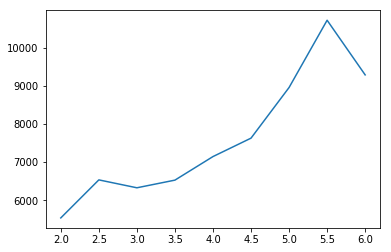

In [38]:
plt.plot(zzfiles, [hmass[zz][0]/10**(11-0.4*zz) for zz in zzfiles])


In [3]:
# for zz  in zzfiles:
#     plt.plot(hmass[zz][::10], h1mass[zz][::10], label=zz, lw=2)
# # plt.plot(halos['Mass'].compute()[::100], halos['H1mass'].compute()[::100])
# plt.loglog()
# plt.legend(ncol=2)

In [4]:
zz = 2.0
hmass[zz][shid[zz][np.argmax(smass[zz]/hmass[zz][shid[zz]])]]/dohod.HI_mass(1, 1/(zz+1), 'mcut')

0.7443058540236923

In [5]:
(smass[zz]/hmass[zz][shid[zz]]).max()

0.3333331658958515

In [49]:
zzfiles

[6.0, 5.5, 5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0]

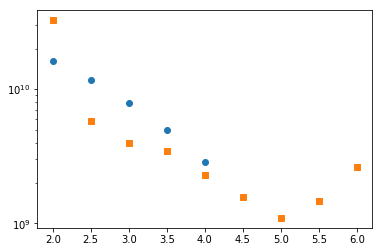

In [54]:
mcc = dohod.HI_mass(1, np.array(aafiles), 'mcut')
mcc2 = mcc.copy()
mcc2[-1] *= 2.
mcc2[-2] *= 0.5
mcc2[-3] *= 0.5
mcc2[-4] *= 0.7
mcc2[-5] *= 0.8

plt.plot(zzfiles, mcc, 'o')
plt.plot(zzfiles, mcc2, 's')
plt.yscale('log')

In [6]:
tmp = (dohod.HI_mass(1, 1/(zz+1), 'mcut')/(hmass[zz]/10) > 1).sum()


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(10, 20000000.0)

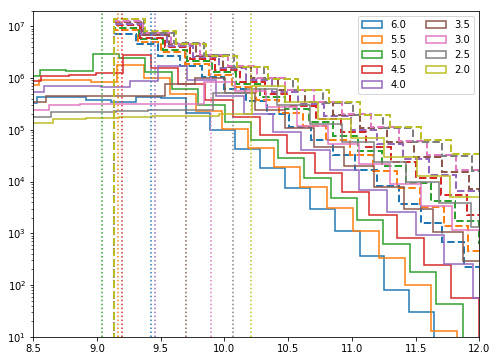

In [7]:
plt.figure(figsize=(8, 6))
for i, zz  in enumerate(zzfiles):
#     plt.hist(np.log10(smass[zz]), color='C%d'%i, bins=50, histtype='step', label=zz, log=False, lw=2, normed=True)
#     plt.hist(np.log10(cmass[zz]), color='C%d'%i, bins=50, histtype='step', label=zz, log=False, lw=2, normed=True, ls="--")
    plt.hist(np.log10(smass[zz]), color='C%d'%i, bins=20, histtype='step', label=zz, log=True, lw=1.5, normed=False)
    plt.hist(np.log10(cmass[zz]), color='C%d'%i, bins=20, histtype='step', log=True, lw=2, normed=False, ls="--")
    plt.axvline(np.log10(dohod.HI_mass(1, aafiles[i], 'mcut')), color='C%d'%i, ls=":")
plt.legend(ncol=2, loc=1)
plt.xlim(8.5, 12)
plt.ylim(10, 2e7)


In [8]:
# plt.figure(figsize=(8, 6))
# for i, zz  in enumerate(zzfiles):
# #     plt.hist(np.log10(smass[zz]), color='C%d'%i, bins=50, histtype='step', label=zz, log=False, lw=2, normed=True)
#     plt.hist(np.log10(cmass[zz]), color='C%d'%i, bins=50, histtype='step', label=zz, log=True, lw=2, normed=False, ls="-")
#     plt.axvline(np.log10(dohod.HI_mass(1, aafiles[i], 'mcut')), color='C%d'%i, ls=":")
# plt.legend(ncol=2, loc=1)
# plt.xlim(8.5, 13)
# plt.ylim(10, 1e7)

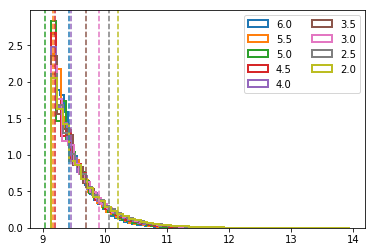

In [9]:
for i, zz  in enumerate(zzfiles):
    plt.hist(np.log10(cmass[zz]), color='C%d'%i, bins=50, histtype='step', label=zz, log=False, lw=2, normed=True)
    plt.axvline(np.log10(dohod.HI_mass(1, aafiles[i], 'mcut')), color='C%d'%i, ls="--")
plt.legend(ncol=2, loc=1)


In [ ]:
# zz = 2.0
# hid, hcount = np.unique(shid[zz], return_counts=True)
# scount = np.zeros_like(hmass[zz])
# scount[hid] = hcount
# plt.plot(np.log10(hmass[zz]), scount, '.')


In [6]:
for i, zz in enumerate(zzfiles):
    print(np.log10(hmass[zz][0]), np.log10(hmass[zz][-1]))

12.56793348692496 9.137505670080772
12.830264488235496 9.137505670080772
12.95216105799575 9.137505670080772
13.08245384881687 9.137505670080772
13.254011718153212 9.137505670080772
13.414720803986537 9.137505670080772
13.601137406846082 9.137505670080772
13.815143414648237 9.137505670080772
13.943176406779147 9.137505670080772


In [33]:
satcount = {}
for zz in zzfiles:
    print(zz)
    satcount[zz] = np.unique(shid[zz], return_counts=True)
    


6.0
5.5
5.0
4.5
4.0
3.5
3.0
2.5
2.0


In [34]:
satcount

{6.0: (array([       0,        1,        2, ..., 18242545, 18242637, 18242735]),
  array([11, 16,  8, ...,  1,  1,  1])),
 5.5: (array([       0,        1,        2, ..., 20963553, 20963582, 20963651]),
  array([45, 29, 32, ...,  1,  1,  1])),
 5.0: (array([       0,        1,        2, ..., 23574908, 23575268, 23575413]),
  array([86, 76, 64, ...,  1,  1,  1])),
 4.5: (array([       0,        1,        2, ..., 25948635, 25948895, 25948944]),
  array([92, 72, 75, ...,  1,  1,  1])),
 4.0: (array([       0,        1,        2, ..., 28236241, 28237573, 28240086]),
  array([69, 61, 73, ...,  1,  1,  1])),
 3.5: (array([       0,        1,        2, ..., 26687901, 26704542, 26725031]),
  array([60, 55, 43, ...,  1,  1,  1])),
 3.0: (array([       0,        1,        2, ..., 18022552, 18071665, 18135217]),
  array([52, 52, 43, ...,  1,  1,  1])),
 2.5: (array([       0,        1,        2, ..., 12750310, 12810332, 12818683]),
  array([57, 49, 47, ...,  1,  1,  1])),
 2.0: (array([      0,  

In [34]:
hcount, hm, ch1, sh1, hh1, scount = {}, {}, {}, {}, {}, {}
for zz in zzfiles:
    print(zz)
    hbins = np.logspace(np.log10(hmass[zz][-1])-0.01, np.log10(hmass[zz][0])-0.01)
    hcount[zz], hm[zz], ch1[zz], sh1[zz], hh1[zz], scount[zz] = [np.zeros_like(hbins) for i in range(6)]
    for i in range(hbins.size-1):
        r1, r2 = np.where(hmass[zz]>hbins[i])[0][-1], np.where(hmass[zz]>hbins[i+1])[0][-1]
        hcount[zz][i] = (r1-r2)
        hm[zz][i] = (hmass[zz][r2:r1].sum())
        ch1[zz][i] = (ch1mass[zz][(chid[zz] < r1) & (chid[zz] > r2)].sum())
        sh1[zz][i] = (sh1mass[zz][(shid[zz] < r1) & (shid[zz] > r2)].sum())
        scount[zz][i] = (((shid[zz] < r1) & (shid[zz] > r2)).sum())
        hh1[zz][i] = (ch1[zz][i]+sh1[zz][i])
    


6.0
5.5
5.0
4.5
4.0
3.5
3.0
2.5
2.0


In [42]:
scount[2.0], hcount[2.0]

(array([   0.,    0.,    0.,    0.,    0.,   59.,  940., 2163., 2972.,
        3654., 4310., 4924., 5440., 5878., 6018., 6350., 6437., 6646.,
        6717., 7027., 6951., 6900., 6991., 7250., 7087., 7045., 7030.,
        6831., 6702., 6187., 6062., 6068., 5622., 5292., 4957., 4719.,
        4257., 3776., 3201., 3242., 2415., 1975., 2044., 1403.,  841.,
         770.,  501.,  202.,  505.,    0.]),
 array([6.490796e+06, 5.138553e+06, 3.979229e+06, 3.423474e+06,
        2.722028e+06, 2.101045e+06, 1.703861e+06, 1.458664e+06,
        1.122739e+06, 9.121990e+05, 7.504550e+05, 6.031580e+05,
        4.981520e+05, 4.012400e+05, 3.198610e+05, 2.598120e+05,
        2.099810e+05, 1.689700e+05, 1.355700e+05, 1.080790e+05,
        8.646100e+04, 6.873700e+04, 5.515600e+04, 4.384300e+04,
        3.457100e+04, 2.718000e+04, 2.111300e+04, 1.672800e+04,
        1.282000e+04, 9.923000e+03, 7.662000e+03, 5.876000e+03,
        4.461000e+03, 3.319000e+03, 2.551000e+03, 1.901000e+03,
        1.365000e+03, 9.

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


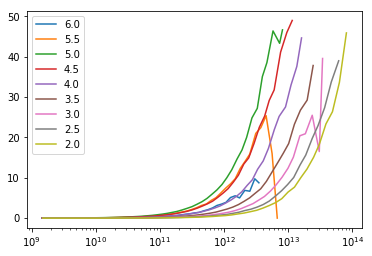

In [43]:
for zz in zzfiles:
    plt.plot(hm[zz]/hcount[zz], scount[zz]/hcount[zz], label=zz)
plt.xscale('log')
plt.legend()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


[]

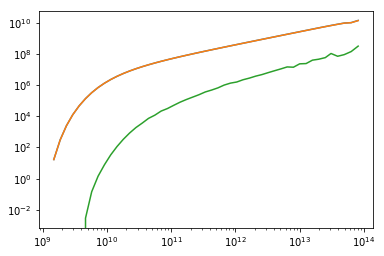

In [44]:
plt.plot(hm[zz]/hcount[zz], hh1[zz]/hcount[zz])
plt.plot(hm[zz]/hcount[zz], ch1[zz]/hcount[zz])
plt.plot(hm[zz]/hcount[zz], sh1[zz]/hcount[zz])
plt.loglog()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


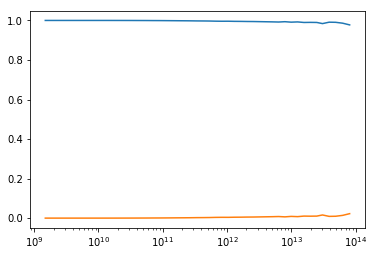

In [46]:
# plt.plot(hm[zz]/hcount[zz], hh1[zz]/hcount[zz])
plt.plot(hm[zz]/hcount[zz], ch1[zz]/hh1[zz])
plt.plot(hm[zz]/hcount[zz], sh1[zz]/hh1[zz])
# plt.loglog()
plt.xscale('log')

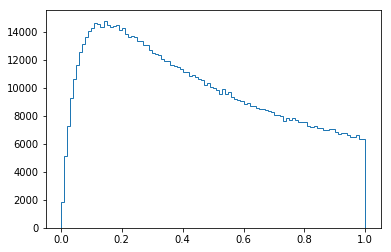

In [101]:
def get_nfw_r(c):
    while True:
        x = np.random.uniform() * c
        if np.random.uniform() < 4*x/(1+x)/(1+x):
            return x / c
        
rr = []
for i in range(1000000): rr.append(get_nfw_r(7))
    
plt.hist(rr, bins=100, histtype='step')
plt.show()

# Highres cosmo4d

In [40]:
bs = 400
nc = 128
ncf = 512
step = 5
stepf = 40
path = '/project/projectdirs/astro250/chmodi/cosmo4d/data/z00/'
pm = ParticleMesh(BoxSize=bs, Nmesh = [nc, nc, nc])
pmf = ParticleMesh(BoxSize=bs, Nmesh = [ncf, ncf, ncf])

In [41]:
seed = 100
mesh = BigFileMesh(path + 'L%04d_N%04d_S%04d_%02dstep/mesh'%(bs, nc, seed, step), 'd').paint()
meshf = BigFileMesh(path + 'L%04d_N%04d_S%04d_%02dstep/mesh'%(bs, ncf, seed, stepf), 'd').paint()
cat = BigFileCatalog(path + 'L%04d_N%04d_S%04d_%02dstep/FOF'%(bs, ncf, seed, stepf))
parts = BigFileCatalog(path + 'L%04d_N%04d_S%04d_%02dstep/dynamic/1'%(bs, nc, seed, step))

In [42]:
hpos = cat['PeakPosition'].compute()
hmass = cat['Mass'].compute()
hlen = cat['Length'].compute()

In [43]:
hpos.shape[0]/bs**3

0.00658259375

In [8]:
parts['Position'].compute().shape

(2097152, 3)

In [9]:
mesh2 = pm.paint(parts['Position'])
meshsub = pmf.paint(parts['Position'])
meshsubn = pmf.paint(parts['Position'], resampler='nearest')
meshsubsm = ft.smooth(meshsub, 3, 'fingauss')

In [10]:
(meshsub[...] > 0).sum()

11339728

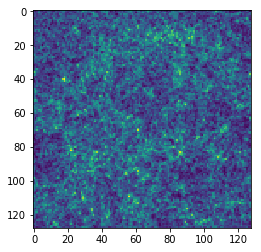

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


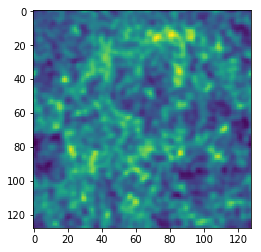

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


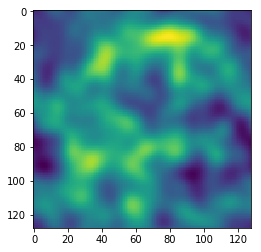

In [53]:
num = int(1e-3*bs**3)
hpmesh = pm.paint(hpos[:num])
plt.imshow(hpmesh[...].sum(axis=0))
plt.show()
hpmeshsm = hpmesh.r2c().apply(lambda k, v: v * np.exp(-sum(ki**2 for ki in k)* 3**2)).c2r()
plt.imshow(hpmeshsm[...].sum(axis=0))
plt.show()
hpmeshsm = hpmesh.r2c().apply(lambda k, v: v * np.exp(-sum(ki**2 for ki in k)* 10**2)).c2r()
plt.imshow(hpmeshsm[...].sum(axis=0))
plt.show()


In [11]:
num = int(1e-3*bs**3)
hpmesh = pmf.paint(hpos[:num])
dmread0 = mesh.readout(hpos[:num])
dmread = meshsub.readout(hpos[:num])
dmreadnn = meshsubn.readout(hpos[:num])
dmreadsm = meshsubsm.readout(hpos[:num])


In [12]:
(dmread <= 0).sum()/num, (dmreadnn <= 0).sum()/num, (dmreadsm <= 0).sum()/num

(0.037765625, 0.17696875, 0.0)

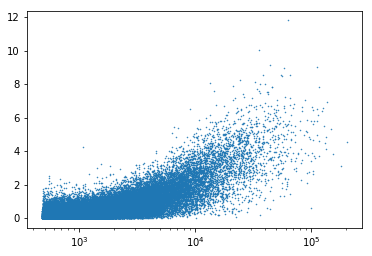

In [13]:
plt.plot(hmass[:num], dmread, '.', ms=1)
# plt.plot(hmass[:num], dmread0, '.', ms=1)
plt.xscale('log')

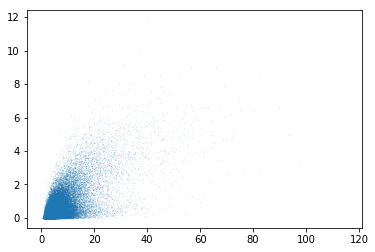

In [105]:
# plt.plot(dmread0[-10000:], dmread[-10000:], '.', ms=1)
plt.plot(dmread0[:], dmread[:], '.', ms=.1)
# plt.xscale('log')

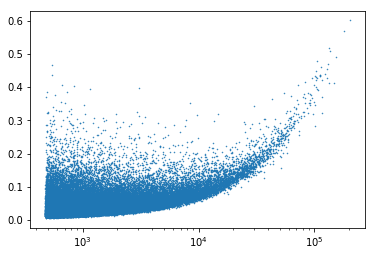

In [83]:
plt.plot(hmass[:num], dmreadsm, '.', ms=1)
plt.xscale('log')

In [94]:
((meshsub[...] > 0) & (hpmesh[...] > 0)).sum()/(meshsub[...] > 0).sum()

0.03365495186480663

In [76]:
sidef = bs/ncf

In [4]:
hmass[-1]/13/sidef**3

KeyError: -1

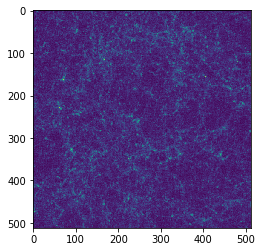

In [78]:
plt.imshow(meshsub[...].sum(axis=0))

# xi

In [3]:
halos['Position'].compute()

array([[210.47978 , 160.1213  ,  36.258488],
       [242.43346 , 138.08238 , 229.80309 ],
       [ 23.879177,  62.89378 ,  25.76578 ],
       ...,
       [240.10474 , 230.82526 ,  51.442364],
       [240.18822 , 245.64674 , 148.63342 ],
       [241.02374 , 224.17766 , 154.17302 ]], dtype=float32)

In [49]:
mcatlow = BigFileCatalog('/global/cscratch1/sd/yfeng1/m3127/lowres/256-9100-fixed/fastpm_0.1667/', dataset='1')
mcatlow.csize/256**3

1.0

In [63]:
mcat['Position'].shape[0]/(2560**3 * 0.04 )

0.9999480232596397

671088640.0

In [4]:
mcat = BigFileCatalog('/global/cscratch1/sd/yfeng1/m3127/highres/2560-9100-fixed/fastpm_0.2000', dataset='1')

In [7]:
mcat.attrs['BoxSize'] = [256., 256., 256.]

In [8]:
mcat.attrs

{'BoxSize': [256.0, 256.0, 256.0],
 'HubbleParam': array([0.67699952]),
 'LibFastPMVersion': array(['1', '.', '0', '.', 'b', 'b', '0', '1', 'c', 'd', '7', '2', 'e',
        '1'], dtype='<U1'),
 'MassTable': array([0.        , 0.00857799, 0.        , 0.        , 0.        ,
        0.        ]),
 'NC': array([2560]),
 'Omega0': array([0.309167]),
 'OmegaLambda': array([0.690833]),
 'OmegaM': array([0.309167]),
 'ParamFile': array(['{', '\n', '\t', ..., '\n', '}', ''], dtype='<U1'),
 'ParticleFraction': array([0.04]),
 'RSDFactor': array([0.00797207]),
 'ScalingFactor': array([0.2]),
 'Time': array([0.2]),
 'TotNumPart': array([       0, 28240463,        0,        0,        0,        0]),
 'UnitLength_in_cm': array([3.085678e+24]),
 'UnitMass_in_g': array([1.989e+43]),
 'UnitVelocity_in_cm_per_s': array([100000.]),
 'UsePeculiarVelocity': array([1], dtype=int32),
 'M0': array([0.00857799]),
 'a.v': array([0.2]),
 'a.x': array([0.2]),
 'q.scale': array([0.1, 0.1, 0.1]),
 'q.shift': array(

In [9]:
from nbodykit.lab import SimulationBox2PCF, FFTCorr

In [27]:
mcats1 = mcat[:1000]
# mcats2 = mcat[:10000]
# mcats3 = mcat[:100000]
# mcats4 = mcat[:1000000]
# mcats5 = mcat[:10000000]


In [13]:
pos = mcats4['Position'].compute()

In [19]:
pos.shape

(1000000, 3)

In [25]:
((pos[:, 0]+100)%256).max(), ((pos[:, 0]+100)%256).min()

(106.24973, 96.57184)

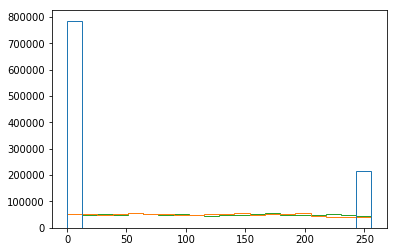

In [20]:
plt.hist(pos, histtype='step', bins=20)
# plt.hist(pos[:, 1], histtype='step')
# plt.hist(pos[:, 2])
plt.show()

In [28]:
start = time()
tmp1 = SimulationBox2PCF('1d',  mcats1, edges=np.logspace(0, 0.5, 20))
end = time()
print(end- start)

2.5594589710235596


In [31]:
mcat.attrs

{'BoxSize': [256.0, 256.0, 256.0],
 'HubbleParam': array([0.67699952]),
 'LibFastPMVersion': array(['1', '.', '0', '.', 'b', 'b', '0', '1', 'c', 'd', '7', '2', 'e',
        '1'], dtype='<U1'),
 'MassTable': array([0.        , 0.00857799, 0.        , 0.        , 0.        ,
        0.        ]),
 'NC': array([2560]),
 'Omega0': array([0.309167]),
 'OmegaLambda': array([0.690833]),
 'OmegaM': array([0.309167]),
 'ParamFile': array(['{', '\n', '\t', ..., '\n', '}', ''], dtype='<U1'),
 'ParticleFraction': array([0.04]),
 'RSDFactor': array([0.00797207]),
 'ScalingFactor': array([0.2]),
 'Time': array([0.2]),
 'TotNumPart': array([       0, 28240463,        0,        0,        0,        0]),
 'UnitLength_in_cm': array([3.085678e+24]),
 'UnitMass_in_g': array([1.989e+43]),
 'UnitVelocity_in_cm_per_s': array([100000.]),
 'UsePeculiarVelocity': array([1], dtype=int32),
 'M0': array([0.00857799]),
 'a.v': array([0.2]),
 'a.x': array([0.2]),
 'q.scale': array([0.1, 0.1, 0.1]),
 'q.shift': array(

In [42]:
tmp1.corr['corr']

array([11933.18853987,  9580.97669107,  8770.44928269,  7708.43114288,
        6601.76573294,  6135.755397  ,  5156.21928192,  4186.43237343,
        3809.51373664,  3183.96408048,  2895.98156295,  2719.10329832,
        2203.47051042,  2018.58396067,  1686.04656327,  1644.88789921,
        1450.2309773 ,  1159.65970589,  1202.95680301])

In [20]:
start = time()
tmp2 = SimulationBox2PCF('1d',  mcats2, edges=np.logspace(0, 0.5, 20))
end = time()
print(end- start)


0.5968317985534668


In [21]:
start = time()
tmp3 = SimulationBox2PCF('1d',  mcats3, edges=np.logspace(0, 0.5, 20))
end = time()
print(end- start)

1.0452873706817627


In [22]:
start = time()
tmp4 = SimulationBox2PCF('1d',  mcats4, edges=np.logspace(0, 0.5, 20))
end = time()
print(end- start)

15.665473461151123


In [25]:
start = time()
tmp5 = SimulationBox2PCF('1d',  mcats5, edges=np.logspace(0, 0.5, 20))
end = time()
print(end- start)

1220.0993597507477


In [ ]:
start = time()
tmp11 = SimulationBox2PCF('1d',  mcats1, edges=np.logspace(0, 1.5, 30))
end = time()
print(end- start)
start = time()
tmp22 = SimulationBox2PCF('1d',  mcats2, edges=np.logspace(0, 1.5, 30))
end = time()
print(end- start)
start = time()
tmp33 = SimulationBox2PCF('1d',  mcats3, edges=np.logspace(0, 1.5, 30))
end = time()
print(end- start)
start = time()
tmp44 = SimulationBox2PCF('1d',  mcats4, edges=np.logspace(0, 1.5, 30))
end = time()
print(end- start)
start = time()
tmp55 = SimulationBox2PCF('1d',  mcats5, edges=np.logspace(0, 1.5, 30))
end = time()
print(end- start)

0.22180438041687012
1.2688536643981934
25.228330612182617
1031.976854801178


In [ ]:
# tmp44 = SimulationBox2PCF('1d',  mcats4, edges=np.logspace(0, 1.8, 30))
# end = time()
# print(end- start)

[]

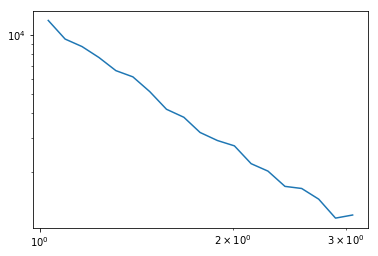

In [23]:
# plt.plot(tmp.corr['r'], tmp.corr['r']**2 * tmp.corr['corr'])
plt.plot(tmp.corr['r'],  tmp.corr['corr'])
plt.loglog()

# nfw

In [26]:
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp1d, interp2d

In [6]:
#  float get_nfw_r(const float c) const {
#     // Returns r/rvir, using a simple sampling strategy
#     float   x;
#     while (1==1) {
#       x = drand48() * c;
#       if (drand48() < 4*x/(1+x)/(1+x)) { /* Compare to r^2.rho(r) */
#         return(x/c);
#       }
#     }
#   }

# def get_nfw_r(c=7):
#     x = np.random.uniform() * c
#     while (np.random.uniform() > 4*x/(1+x)/(1+x)):
#         x = np.random.uniform() * c
#     else:
#         return(x/c)

def get_nfw_r(c=7):
    while (True):
        x = np.random.uniform() * c
        if (np.random.uniform() < 4*x/(1+x)/(1+x)):
            return(x/c)


In [68]:
def gcum(x):
    return np.log(1+x) - x/(1+x)
    
def cumnfw(r, c=7):
    '''cumulative pdf for nfw profile at scaled radius(by r_vir)=r
    Taken from https://halotools.readthedocs.io/en/latest/source_notes/empirical_models/phase_space_models/nfw_profile_source_notes.html
    '''
    return gcum(r*c)/gcum(c)

def ilogcdfnfw(c=7):
    rr = np.logspace(-5, 0, 1000)
    cdf = cumnfw(rr, c=c)
    lrr, lcdf = np.log(rr), np.log(cdf)
    return interp1d(lcdf, lrr)
    

def ilcdf2dfunc():
    civ = np.linspace(5, 10, 100)
    cdfiv = np.logspace(-5, 0, 1000)
    riv = []
    for i , c in enumerate(civ):
        riv.append(ilogcdfnfw(c)(np.log(cdfiv)))
    riv = np.array(riv)
    return interp2d(civ, np.log(cdfiv), riv.T)    
#     return interp2d(np.log(cdfiv), civ, riv)    
    
def sampleilogcdf(n, ilogcdf):
    u = np.random.uniform(size=n)
    lu = np.log(u)
    lx = ilogcdf(lu)
    return np.exp(lx)

r = sampleilogcdf(int(1e6), ilogcdfnfw(c=7))


In [51]:
# riv = np.logspace(-5, 0, 1000)
# civ = np.linspace(5, 10, 100)
# r2d, c2d = np.meshgrid(riv, civ)
# cdf2d = cumnfw(r2d, c2d)
# lriv, lcdf2d = np.log(riv), np.log(cdf2d)

# riv = np.logspace(-5, 0, 1000)


In [8]:
%timeit ilogcdfnfw(np.random.uniform()*10)

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log


219 µs ± 5.88 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


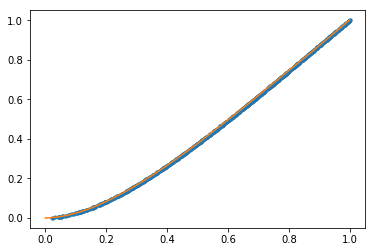

In [33]:
c = 7 
rr = np.array([get_nfw_r(c) for i in range(100000)])
rric = sampleilogcdf(100000, ilogcdfnfw(c=c))

tmp = np.histogram(rr, bins=1000)
tmpx = tmp[1][:-1]
tmpy = np.cumsum(tmp[0])
tmpy = tmpy/tmpy[-1]

plt.plot(rr[::100], cumnfw(rr[::100], c=c), '.')
plt.plot(tmpx, tmpy)

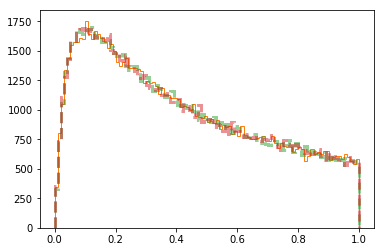

In [74]:
c = 9.991
rr = np.array([get_nfw_r(c) for i in range(100000)])
rric = sampleilogcdf(100000, ilogcdfnfw(c=c))

ilcdf2d = ilcdf2dfunc()
tmp = lambda x: ilcdf2d(c, x)
rric2d = sampleilogcdf(100000, tmp)

plt.hist(rr, histtype='step', bins=100, color='C%d'%(1), ls="-", lw=1, label='c = %d'%c)
plt.hist(rric, histtype='step', bins=100, color='C%d'%(2), ls="--", lw=3, alpha=0.5)
plt.hist(rric2d, histtype='step', bins=100, color='C%d'%(3), ls="--", lw=3, alpha=0.5)
plt.show()

In [63]:
n = int(1e6)
%timeit np.array([get_nfw_r(7) for i in range(n)])
ilcdf = ilogcdfnfw(c=7)
%timeit rric = sampleilogcdf(n, ilcdf)


2.63 s ± 94.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
102 ms ± 948 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [91]:
cc = np.random.uniform(low=5, high=10, size=10000)
nn =[]
for i, c in enumerate(cc):
    nn.append(np.random.randint(1, 10))
np.array(nn).sum()    

49901

In [92]:
%%timeit 

for i, c in enumerate(cc):
    n = nn[i]
    rr = [get_nfw_r(c) for i in range(n)]    

226 ms ± 7.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [93]:
%%timeit 
for i, c in enumerate(cc):
    n = nn[i]
    ilcdf =  ilogcdfnfw(c)
    rr = sampleilogcdf(n, ilcdf)
    

2.69 s ± 63.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [94]:
ilcdf2d = ilcdf2dfunc()


In [95]:
%%timeit 
for i, c in enumerate(cc):
    n = nn[i]
    ilcdf = lambda x: ilcdf2d(c, x)
    rr = sampleilogcdf(n, ilcdf)
    

223 ms ± 7.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


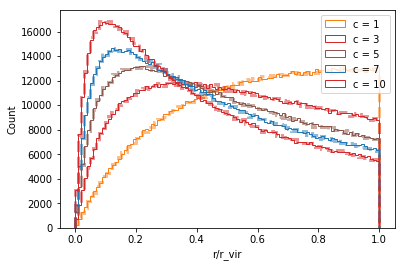

In [18]:
for c in [1, 3, 5, 7, 10]:
    n = int(1e6)
    rr = np.array([get_nfw_r(c) for i in range(n)])
    rric = sampleilogcdf(n, ilogcdfnfw(c))
    plt.hist(rr, histtype='step', bins=100, color='C%d'%(c%7), ls="-", lw=1, label='c = %d'%c)
    plt.hist(rric, histtype='step', bins=100, color='C%d'%(c%7), ls="--", lw=3, alpha=0.5)
plt.legend()
plt.xlabel('r/r_vir')
plt.ylabel('Count')
plt.show()

# Satellite SN


In [152]:

def HI_hod(mhalo,aa,mcut=2e9):
    """Returns the 21cm "mass" for a box of halo masses."""
    zp1 = 1.0/aa
    zz  = zp1-1
    alp = 1.0
    alp = (1+2*zz)/(2+2*zz)
    norm= 3e5*(1+(3.5/zz)**6)
    xx  = mhalo/mcut+1e-10
    mHI = xx**alp * np.exp(-1/xx)
    mHI*= norm
    return(mHI)
    #

    
nc = 256
    
project = '/project/projectdirs/m3127/H1mass/'
sim, prefix = 'highres/%d-9100-fixed'%2560, 'highres'
suff='-m1_8p0min-alpha_0p9'
    
aa = 0.3333

mcut = 1e9*( 1.8 + 15*(3*aa)**8 )
cencat = BigFileCatalog(project+sim+'/fastpm_%0.4f/cencat'%aa)
satcat = BigFileCatalog(project+sim+'/fastpm_%0.4f/satcat'%aa+suff)
#
cencat['HImass'] = HI_hod(cencat['Mass'],aa,mcut)   
satcat['HImass'] = HI_hod(satcat['Mass'],aa,mcut)   
ch1mass = cencat['HImass'].compute()
sh1mass = satcat['HImass'].compute()
# totHImass        = cencat['HImass'].sum().compute() +\
#                    satcat['HImass'].sum().compute()
# cencat['HImass']/= totHImass/float(nc)**3
# satcat['HImass']/= totHImass/float(nc)**3
#
allcat = MultipleSpeciesCatalog(['cen','sat'],cencat,satcat)
#
h1mesh     = allcat.to_mesh(BoxSize=bs,Nmesh=[nc,nc,nc],weight='HImass',value='HImass')
###pkh1h1     = FFTPower(h1mesh/h1mesh.cmean(),mode='1d').power
pkh1h1     = FFTPower(h1mesh,mode='1d').power
print("SN=",pkh1h1.attrs['shotnoise'])

SN= 0.5062638559705809


In [156]:
bs**3 * ((ch1mass**2).sum() + (sh1mass**2).sum()) / ((ch1mass).sum() + (sh1mass).sum())**2

41.11725962286755

In [161]:
bs**3 * ((ch1mass.size)**1 + (sh1mass.size)**1) / ((ch1mass).size + (sh1mass).size)**2

0.4613400908781806

In [157]:
satcat.csize, sh1mass.size

(3451693, 3451693)

In [158]:
bs**3/(ch1mass.size + sh1mass.size)

0.4613400908781806

In [162]:
bs**3/ch1mass.size , bs**3/sh1mass.size

(0.5097200109422659, 4.860575955045828)

In [163]:
bs**3 * ((ch1mass**2).sum()/ch1mass.size + (sh1mass**2).sum()/sh1mass.size) / ((ch1mass).sum() + (sh1mass).sum())**2

1.732946331518884e-06

In [155]:
h1mesh.compute().cmean()

270837312.0

In [139]:
totHImass/nc**3

1829967.2443628227

9.12222159947145

In [142]:
ch1mass

array([1.53370041e+09, 1.33497072e+09, 1.32172987e+09, ...,
       6.78636367e+04, 6.78636367e+04, 6.78636367e+04])

# Plots

In [50]:
dpath = '/project/projectdirs/m3127/H1mass/'
# dpath = '../data/'

bs, nc = 256, 256
# sim = '/lowres/%d-9100-fixed'%256
sim = '/highres/%d-9100-fixed'%2560
aafiles = [0.1429, 0.1538, 0.1667, 0.1818, 0.2000, 0.2222, 0.2500, 0.2857, 0.3333]
zzfiles = [round(tools.atoz(aa), 2) for aa in aafiles]




(10, 10000000.0)

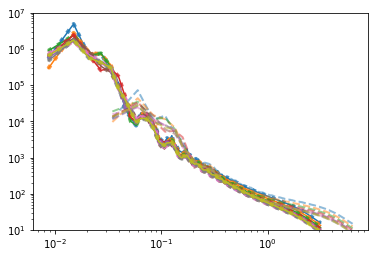

In [49]:
#1D 
for i, aa in enumerate(aafiles[:2]):
#     pk = np.loadtxt('../data/HI_pks_1d_%.4f.txt'%(aa)).T
    pk = np.loadtxt('../data/L1024/Halocat_pks_1d_%.4f.txt'%(aa)).T
    plt.loglog(pk[0][1:], pk[1][1:], 'C%d:'%i, label=aa, lw=4, alpha=0.8)
    pk = np.loadtxt('../data/L1024/Halo_pks_1d_%.4f.txt'%(aa)).T
    plt.loglog(pk[0][1:], pk[1][1:], 'C%d'%i, label=aa)
    pk = np.loadtxt('../data/L0256/Halo_pks_1d_%.4f.txt'%(aa)).T
    plt.loglog(pk[0][1:], pk[1][1:], 'C%d--'%i, lw=2, alpha=0.5, label=aa)
# plt.legend(loc=bbox_to_anchor(1, 1))
plt.ylim(10, 1e7)

(10, 1000)

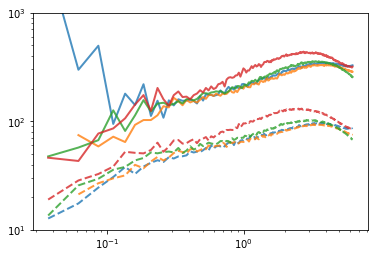

In [86]:
#kmu 

for i, aa in enumerate(aafiles[:1]):
#     pk = np.loadtxt('../data/HI_pks_1d_%.4f.txt'%(aa)).T
#     pk = np.loadtxt('../data/L1024/HI_pks_mu_%0.4f.txt'%(aa)).T
#     plt.loglog(pk[0], pk[0]**2*pk[1], 'C%d:'%i, label=aa, lw=4, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[2], 'C%d:'%(i+1), label=aa, lw=4, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[3], 'C%d:'%(i+2), label=aa, lw=4, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[4], 'C%d:'%(i+3), label=aa, lw=4, alpha=0.8)
#     pk = np.loadtxt('../data/L0256/HI_pks_mu_%0.4f.txt'%(aa)).T
#     plt.loglog(pk[0], pk[0]**2*pk[1], 'C%d-'%i, label=aa, lw=2, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[2], 'C%d-'%(i+1), label=aa, lw=2, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[3], 'C%d-'%(i+2), label=aa, lw=2, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[4], 'C%d-'%(i+3), label=aa, lw=2, alpha=0.8)
    pk = np.loadtxt('../data/L0256-1/HI_pks_mu_%0.4f.txt'%(aa)).T
    plt.loglog(pk[0], pk[0]**2*pk[1], 'C%d--'%i, label=aa, lw=2, alpha=0.8)
    plt.loglog(pk[0], pk[0]**2*pk[2], 'C%d--'%(i+1), label=aa, lw=2, alpha=0.8)
    plt.loglog(pk[0], pk[0]**2*pk[3], 'C%d--'%(i+2), label=aa, lw=2, alpha=0.8)
    plt.loglog(pk[0], pk[0]**2*pk[4], 'C%d--'%(i+3), label=aa, lw=2, alpha=0.8)
    pk = np.loadtxt('../data/L0256-4/HI_pks_mu_%0.4f.txt'%(aa)).T
    plt.loglog(pk[0], pk[0]**2*pk[1], 'C%d-'%i, label=aa, lw=2, alpha=0.8)
    plt.loglog(pk[0], pk[0]**2*pk[2], 'C%d-'%(i+1), label=aa, lw=2, alpha=0.8)
    plt.loglog(pk[0], pk[0]**2*pk[3], 'C%d-'%(i+2), label=aa, lw=2, alpha=0.8)
    plt.loglog(pk[0], pk[0]**2*pk[4], 'C%d-'%(i+3), label=aa, lw=2, alpha=0.8)
plt.ylim(10,1000)

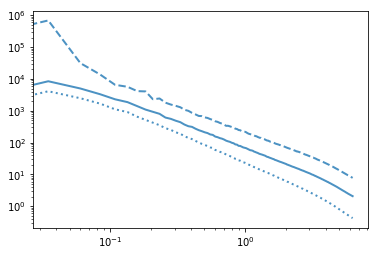

In [92]:
#kmu 

for i, aa in enumerate(aafiles[:1]):
#     pk = np.loadtxt('../data/HI_pks_1d_%.4f.txt'%(aa)).T
#     pk = np.loadtxt('../data/L1024/HI_pks_mu_%0.4f.txt'%(aa)).T
#     plt.loglog(pk[0], pk[0]**2*pk[1], 'C%d:'%i, label=aa, lw=4, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[2], 'C%d:'%(i+1), label=aa, lw=4, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[3], 'C%d:'%(i+2), label=aa, lw=4, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[4], 'C%d:'%(i+3), label=aa, lw=4, alpha=0.8)
#     pk = np.loadtxt('../data/L0256/HI_pks_mu_%0.4f.txt'%(aa)).T
#     plt.loglog(pk[0], pk[0]**2*pk[1], 'C%d-'%i, label=aa, lw=2, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[2], 'C%d-'%(i+1), label=aa, lw=2, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[3], 'C%d-'%(i+2), label=aa, lw=2, alpha=0.8)
#     plt.loglog(pk[0], pk[0]**2*pk[4], 'C%d-'%(i+3), label=aa, lw=2, alpha=0.8)
    pk = np.loadtxt('../data/L0256-1/HI_pkr_1d_%0.4f.txt'%(aa)).T
    plt.loglog(pk[0], pk[0]**0*pk[1], 'C%d-'%i, label=aa, lw=2, alpha=0.8)
    
    pk = np.loadtxt('../data/L0256-1/Halo1_pkr_1d_%0.4f.txt'%(aa)).T
    plt.loglog(pk[0], pk[0]**0*pk[1], 'C%d:'%i, label=aa, lw=2, alpha=0.8)

    pk = np.loadtxt('../data/L0256-4/HI_pkr_1d_%0.4f.txt'%(aa)).T
    plt.loglog(pk[0], pk[0]**0*pk[1], 'C%d--'%i, label=aa, lw=2, alpha=0.8)
    
# plt.ylim(10,1000)

Text(0.5, 0, 'P(k)')

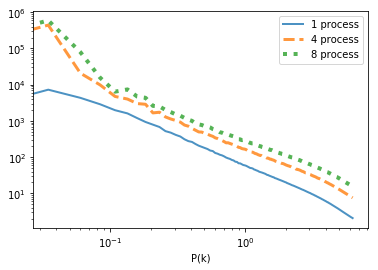

In [102]:
pk = np.loadtxt('../data/pkdebug2-1.txt').T
plt.loglog(pk[0], pk[0]**0*pk[1], 'C%d-'%0, label='1 process', lw=2, alpha=0.8)
pk = np.loadtxt('../data/pkdebug2-4.txt').T
plt.loglog(pk[0], pk[0]**0*pk[1], 'C%d--'%1, label='4 process', lw=3, alpha=0.8)
pk = np.loadtxt('../data/pkdebug2-8.txt').T
plt.loglog(pk[0], pk[0]**0*pk[1], 'C%d:'%2, label='8 process', lw=4, alpha=0.8)
plt.legend()
plt.xlabel('k')
plt.xlabel('P(k)')

(1000.0, 100000000.0)

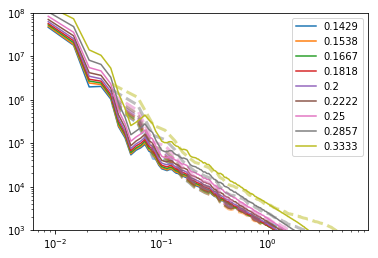

In [81]:
for i, aa in enumerate(aafiles[:]):
#     pk = np.loadtxt('../data/HI_pks_1d_%.4f.txt'%(aa)).T
#     pk = np.loadtxt('../data/L1024/Halocat_pks_1d_%.4f.txt'%(aa)).T
#     plt.loglog(pk[0][1:], pk[1][1:], 'C%d:'%i, label=aa, lw=4, alpha=0.8)
    pk = np.loadtxt('../data/L1024/HI_pks_1d_%.4f.txt'%(aa)).T
    plt.loglog(pk[0][1:], pk[1][1:], 'C%d'%i, label=aa)
    pk = np.loadtxt('../data/L0256/HI_pks_1d_%.4f.txt'%(aa)).T
    plt.loglog(pk[0][1:], pk[1][1:], 'C%d--'%i, lw=3, alpha=0.5)
plt.legend()
plt.ylim(1e3, 1e8)

../data/L1024/HI_bias_0.2500.txt not found.


(0, 5)

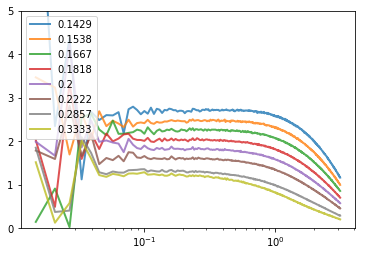

In [60]:
for i, aa in enumerate(aafiles[:]):
#     pk = np.loadtxt('../data/HI_pks_1d_%.4f.txt'%(aa)).T
    try:
        pk = np.loadtxt(f'../data/L1024/HI_bias_{aa:.4f}.txt').T
        plt.semilogx(pk[0][1:], pk[1][1:], 'C%d-'%i, label=aa, lw=2, alpha=0.8)
    except Exception as e: print(e)
#     pk = np.loadtxt('../data/L1024/Halo_pks_1d_%.4f.txt'%(aa)).T
#     plt.loglog(pk[0][1:], pk[1][1:], 'C%d'%i, label=aa)
#     pk = np.loadtxt('../data/L0256/Halo_pks_1d_%.4f.txt'%(aa)).T
#     plt.loglog(pk[0][1:], pk[1][1:], 'C%d--'%i, lw=2, alpha=0.5, label=aa)
plt.legend()
plt.ylim(0, 5)
# plt.ylim(10, 1e7)

In [ ]:
for i, aa in enumerate(aafiles[:]):
#     pk = np.loadtxt('../data/HI_pks_1d_%.4f.txt'%(aa)).T
    try:
        pk = np.loadtxt(f'../data/L1024/HI_bias_{aa:.4f}.txt').T
        plt.semilogx(pk[0][1:], pk[1][1:], 'C%d-'%i, label=aa, lw=2, alpha=0.8)
    except Exception as e: print(e)
#     pk = np.loadtxt('../data/L1024/Halo_pks_1d_%.4f.txt'%(aa)).T
#     plt.loglog(pk[0][1:], pk[1][1:], 'C%d'%i, label=aa)
#     pk = np.loadtxt('../data/L0256/Halo_pks_1d_%.4f.txt'%(aa)).T
#     plt.loglog(pk[0][1:], pk[1][1:], 'C%d--'%i, lw=2, alpha=0.5, label=aa)
plt.legend()
plt.ylim(0, 5)
# plt.ylim(10, 1e7)

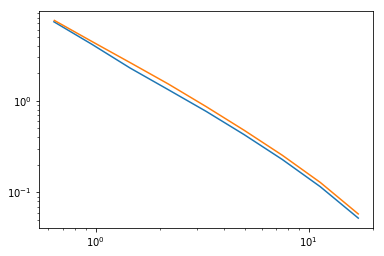

In [16]:
# plt.plot(*np.loadtxt('/global/project/projectdirs/m3127/H1mass/highres/2560-9100-fixed/fastpm_0.1538/xih1mass.txt').T)
x, y = np.loadtxt('/global/project/projectdirs/m3127/H1mass/highres/2560-9100-fixed/fastpm_0.1538/ss-1000/xih1mass.txt').T
# plt.plot(x, y*x**2)
plt.loglog(x, y)
x, y = np.loadtxt('/global/project/projectdirs/m3127/H1mass/highres/2560-9100-fixed/fastpm_0.1538/ss_cm-10000/xigal_h1.txt').T
# plt.plot(x, y*x**2, '--')
plt.loglog(x, y)


# power law sampling

In [33]:

mh = 1e12
mmin = 1e9
mmax = mh/3.
alpha = -0.8

nsat = 100
def nsat_cd(x, xmin=mmin/mh, xmax=mmax/mh, alpha=alpha) : 
    C = nsat * alpha/(xmax**alpha - xmin**alpha)
    return C * (xmax**alpha - x**alpha)/ alpha

nmin = int(nsat_cd(mmin/mh))
nmax = int(nsat_cd(mmax/mh))
n = nmin - nmax
print(nmin, nmax, n)

##Analytic
mm = np.logspace(np.log10(mmin), np.log10(mmax), 1000)[::-1]
nsatcdmm = nsat_cd(mm/mh)/nsat_cd(mm[-1]/mh)

def assign_msat(x, xmin, xmax, alpha):
    return  (xmin**alpha + (xmax**alpha - xmin**alpha)*x)**(1/alpha)
    
msats = []
nhalo = 10000
for i in range(nhalo):
    xx = np.random.uniform(size=n)
    msats.append(mh*assign_msat(xx, mmin/mh, mmax/mh, alpha=alpha))
msats = np.array(msats)

100 0 100


In [4]:
mnum, mval = np.histogram(msats.flatten(), bins=1000, normed=False)
mval = mval[:-1]
mval = mval[::-1]
mnum = mnum[::-1]
mnumcum = np.cumsum(mnum)
mnumcumnorm = mnumcum/mnumcum[-1]
# mnumcum = mnumcum /mnumcum[-1]

# mm = mval[::-1]
# nsatcdmm = nsat_cd(mm)/nsat_cd(mm[0])


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
  if __name__ == '__main__':


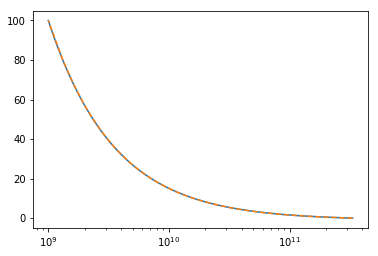

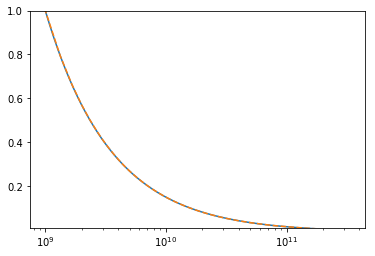

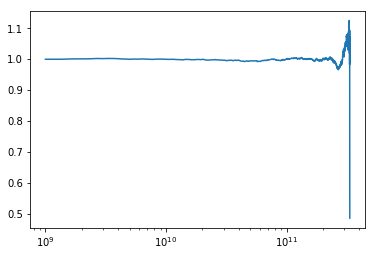

In [7]:
plt.plot(mm, nsat_cd(mm/mh))
# plt.plot(mval, mnum/nhalo)
plt.plot(mval, np.cumsum(mnum)/nhalo, '--')
plt.xscale('log')
plt.show()
plt.semilogx(mm, nsatcdmm)
plt.semilogx(mval, mnumcumnorm, '--')
plt.ylim(1e-2, 1)
plt.show()
from scipy.interpolate import interp1d
# plt.semilogx(mval, mnumcumnorm/np.interp(mval, mm, nsatcdmm), '.')
plt.semilogx(mval, mnumcumnorm/interp1d(mm, nsatcdmm)(mval), '-')
plt.show()


# Check my catalog

In [254]:
yscratch = '/global/cscratch1/sd/yfeng1/m3127/'
project = '/project/projectdirs/m3127/H1mass/'
myscratch = '/global/cscratch1/sd/chmodi/m3127/H1mass/'

# dpath = '../data/'

bs, nc = 256, 256
sim = '/lowres/%d-9100-fixed'%256
# sim = '/highres/%d-9100-fixed'%2560
aafiles = [0.1429, 0.1538, 0.1667, 0.1818, 0.2000, 0.2222, 0.2500, 0.2857, 0.3333]
zzfiles = [round(tools.atoz(aa), 2) for aa in aafiles]

suff = 'm1_00p3mh-alpha-0p8-subvol'
aa = 0.2500
halos = BigFileCatalog(yscratch + sim+ '/fastpm_%0.4f//'%aa, dataset='LL-0.200')
cen = BigFileCatalog(myscratch + sim+ '/fastpm_%0.4f/cencat-%s/'%(aa, suff))
sat = BigFileCatalog(myscratch + sim+ '/fastpm_%0.4f/satcat-%s/'%(aa, suff))
mp = halos.attrs['MassTable'][1]*1e10
hmass = halos['Length'].compute() * mp
# hmass, h1mass = halos["Mass"].compute(), halos['H1mass'].compute()
cmass = cen["Mass"].compute()
smass = sat["Mass"].compute()
hpos, cpos, spos = halos['Position'].compute(), cen['Position'].compute(), sat['Position'].compute()
chid, shid = cen['GlobalID'].compute(), sat['GlobalID'].compute()
cnsat = cen['Nsat'].compute()


In [255]:
ii = 12342
(shid==ii).sum()/cnsat[ii]

1.0

In [256]:
halos.attrs['BoxSize'] = np.broadcast_to(halos.attrs['BoxSize'], 3)


In [258]:
hmass

array([3.65422502e+13, 3.61991305e+13, 3.55128910e+13, ...,
       3.43119720e+11, 3.43119720e+11, 3.43119720e+11])

In [259]:
cmass

array([3.65422502e+13, 3.55128910e+13, 3.05376551e+13, ...,
       3.43119720e+11, 3.43119720e+11, 3.43119720e+11])

In [260]:
cen['HaloMass'].compute()

array([3.65422502e+13, 3.55128910e+13, 3.05376551e+13, ...,
       3.43119720e+11, 3.43119720e+11, 3.43119720e+11])

In [285]:
spos.shape, smass.shape


(3689456, 3)

In [292]:
indices = np.searchsorted(shid, np.arange(hmass.size), side='right')
splits = np.array_split(smass, indices)

In [317]:
splits = np.array_split(spos.flatten(), 3*indices)[:-1]

In [320]:
sspos = []
for i in splits:
    sspos.append( i.reshape(-1, 3))

In [327]:
ii = 10003
np.allclose(sspos[ii]/spos[shid==ii], 1)

True

In [328]:
sspos[ii], spos[shid==ii]

(array([[15.14880823, 46.15544921, 16.66642583],
        [15.28167188, 46.03170151, 16.71360528],
        [15.36256512, 46.08665412, 16.61748069],
        [15.27747168, 46.13225053, 16.58632025],
        [15.35324376, 46.13616865, 16.65576341],
        [15.29060327, 46.10778764, 16.64338269],
        [15.30347843, 46.1613814 , 16.78046727],
        [15.2861225 , 46.17692319, 16.72041962],
        [15.28961077, 46.12688135, 16.73081707],
        [15.26261232, 46.10643841, 16.71712486],
        [15.23132786, 46.13275866, 16.74322463],
        [15.25361219, 46.13411211, 16.71375407],
        [15.28895403, 46.19960464, 16.74554113],
        [15.30350457, 46.04751201, 16.6307104 ],
        [15.2153586 , 46.09464689, 16.74806597]]),
 array([[15.14880823, 46.15544921, 16.66642583],
        [15.28167188, 46.03170151, 16.71360528],
        [15.36256512, 46.08665412, 16.61748069],
        [15.27747168, 46.13225053, 16.58632025],
        [15.35324376, 46.13616865, 16.65576341],
        [15.290603

In [366]:
tosave = smass[shid==10000]
lsave = np.log10(tosave)
master = (np.array([10**i for i in range(lsave.size)])*lsave).sum()
extract = []

current = master
for i in range(lsave.size):
    extract .append( current //2**(lsave.size-i))
    current = master %10**(lsave.size-i)

In [379]:
(lsave[0] + lsave[1]*10) % 10, lsave[0]

(5.7828525985016626, 8.527329511503343)

In [361]:
master // 2**(lsave.size)

9.0

In [298]:
sathmass2 = []
for i in splits:
    sathmass2.append(i.sum())
sathmass2 = np.array(sathmass2)

In [303]:
(sathmass2[:-1]/sathmass).max()

1.0000000000000016

In [261]:
# start = time()
# sathmass = np.zeros_like(hmass)
# unipos, unicount = np.unique(shid, return_inverse=True)

# for i in range(unicount.size):
#     sathmass[unipos[unicount[i]]] +=  smass[i]
# print(time() - start)

# start = time()
# sathmass2 = np.zeros_like(hmass)
# unipos, unicount = np.unique(shid, return_counts=True)

# index = 0 
# for i in range(unicount.size):
#     sathmass2[unipos[i]] =  smass[index:index+unicount[i]].sum()
#     index += unicount[i]
# print(time() - start)


# start = time()
# sathmass = np.zeros_like(hmass)

# index = 0 
# for i in range(shid.size):
#     sathmass[shid[i]] +=  smass[i]
# print(time() - start)


start = time()
sathmass = np.zeros_like(hmass)
tot = np.bincount(shid, smass)
sathmass[:shid[-1]+1] = tot
print(time()-start)

0.01728367805480957


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


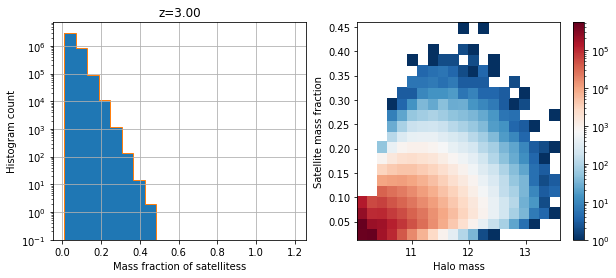

In [689]:
sathmass = np.zeros_like(hmass)
unipos, unicount = np.unique(shid, return_inverse=True)

for i in range(unicount.size):
    sathmass[unipos[unicount[i]]] +=  smass[i]
sathfrac = sathmass/hmass



fig, axar = plt.subplots(1, 2, figsize = (10, 4))
ax = axar[0]
ax.hist(sathmass/hmass, bins=20, range=(0.01, 1.2), log=True, normed=False)
ax.hist(1-cmass/hmass, bins=20, range=(0.01, 1.2), log=True, normed=False, histtype='step')
ax.set_xlabel('Mass fraction of satellitess')
ax.set_ylabel('Histogram count')
ax.set_title('z=%0.2f'%(1/aa-1))
ax.grid(which='major')

ax = axar[1]
im = ax.hist2d(np.log10(hmass[sathfrac > 0]),  sathfrac[sathfrac > 0], bins=20, norm=LogNorm(), cmap='RdBu_r')
plt.colorbar(im[3], ax=ax)
ax.set_xlabel('Halo mass')
ax.set_ylabel('Satellite mass fraction')
plt.show()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Distribution of satellites for 100 halos of mass around 1.21e+13')

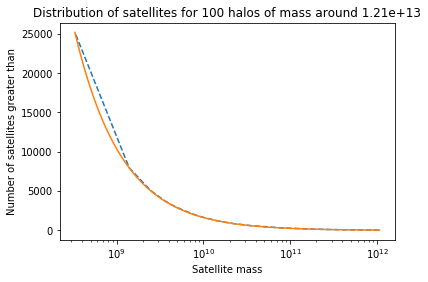

In [196]:
msats = smass[(shid>50) & (shid<150)]
mnum, mval = np.histogram(msats.flatten(), bins=1000, normed=False)
mval = mval[:-1]
mval = mval[::-1]
mnum = mnum[::-1]
mnumcum = np.cumsum(mnum)
mnumcumnorm = mnumcum/mnumcum[-1]
# plt.semilogx(mval, mnumcumnorm, '--')
plt.semilogx(mval, mnumcum, '--')


def nsat_func(x, nsat, xmin, xmax, alpha) : 
    C = nsat * alpha/(xmax**alpha - xmin**alpha)
    return C * (xmax**alpha - x**alpha)/ alpha

mm = np.logspace(np.log10(msats.min()), np.log10(msats.max()), 100)
mh = hmass[50:100].mean()
mmin, mmax = msats.min(), msats.max()
plt.semilogx(mm, nsat_func(mm/mh, msats.size, mmin/mh, mmax/mh, alpha=-0.8))
plt.xlabel('Satellite mass')
plt.ylabel('Number of satellites greater than')
plt.title('Distribution of satellites for 100 halos of mass around %0.2e'%mh)

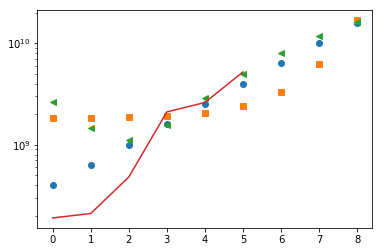

In [128]:
plt.plot( 10**(11-0.4*np.array(zzfiles)), 'o')
plt.plot(1e9*( 1.8 + 15*(3*np.array(aafiles))**8), 's')
plt.plot(1e10*(6.11-1.99*(np.array(zzfiles)+1)+0.165*(np.array(zzfiles)+1)**2), '<')
plt.plot(np.array((5.2e10, 2.6e10, 2.1e10, 4.8e9, 2.1e9, 1.9e9))[::-1] /10)
plt.yscale('log')

In [271]:
hbins = np.logspace(np.log10(hmass[-1])-0.01, np.log10(hmass[0])-0.01)
hcount, hm, ch1 = [np.zeros_like(hbins) for i in range(3)]
ranks = []
for i in range(hbins.size-1):
    r1, r2 = np.where(hmass>hbins[i])[0][-1]+1, np.where(hmass>hbins[i+1])[0][-1]+1
    ranks.append([r1, r2])
    hcount[i] = (r1-r2)
    hm[i] = (hmass[r2:r1].sum())
    ch1[i] = (cmass[(chid < r1) & (chid > r2)].sum())

ranks= np.array(ranks)


In [259]:
# # %%timeit
# ranks = []
# for i in range(hbins.size-1):
#     r1, r2 = np.where(hmass>hbins[i])[0][-1], np.where(hmass>hbins[i+1])[0][-1]
#     ranks.append([r1, r2])
#     hcount[i] = (r1-r2)
#     hm[i] = (hmass[r2:r1].sum())
# #     ch1[i] = (cmass[(chid < r1) & (chid > r2)].sum())



In [260]:
# %%timeit
indices = (np.searchsorted(hmass[::-1], hbins))
splits = np.split(hmass[::-1], indices)
hc2 = np.array([i.size for i in splits])[1:]
hm2 = np.array([i.sum() for i in splits])[1:]


hc2/hcount, hm2/hm

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in true_divide


(array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., inf]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., inf]))

In [263]:
np.searchsorted(shid, (hmass.size - indices)[::-1])

array([     704,     4970,     6040,     9648,    13772,    21526,
          34159,    53762,    82583,   121526,   160461,   218728,
         289593,   381622,   484179,   607531,   756111,   921158,
        1113456,  1326853,  1562923,  1823795,  2110821,  2424182,
        2767631,  3138261,  3538084,  3953633,  4401042,  4866335,
        5350193,  5862795,  6384132,  6902761,  7440475,  8046095,
        8460650,  8967661,  9580104, 10319157, 10319157, 10319157,
       10319157, 10319157, 10319157, 10319157, 10319157, 10319157,
       10319157, 10319157])

In [281]:
splits = np.split(cmass[::-1], np.searchsorted(hmass.size-chid[::-1], indices))
ch2 = np.array([i.sum() for i in splits])

In [273]:
splits = np.split(cmass, np.searchsorted(chid, (hmass.size - indices)[::-1]))
ch2 = np.array([i.sum() for i in splits])

In [282]:
ch2

array([0.00000000e+00, 9.29103103e+15, 7.61211802e+15, 9.41735699e+15,
       8.94945741e+15, 8.42211903e+15, 9.47005975e+15, 8.44175440e+15,
       9.22384339e+15, 9.36092323e+15, 9.17195802e+15, 8.90006318e+15,
       8.74836996e+15, 8.95798092e+15, 9.07860248e+15, 8.84999933e+15,
       8.79208053e+15, 8.71074522e+15, 8.56910680e+15, 8.41306190e+15,
       8.28394551e+15, 8.07851731e+15, 7.91951865e+15, 7.60484670e+15,
       7.46843371e+15, 7.16112497e+15, 6.84279818e+15, 6.45952367e+15,
       6.11128650e+15, 5.76574182e+15, 5.39399442e+15, 5.06613775e+15,
       4.73108987e+15, 4.21098270e+15, 3.93870627e+15, 3.40684997e+15,
       2.93870070e+15, 2.74252276e+15, 2.18832435e+15, 1.88716943e+15,
       1.30779539e+15, 1.35389520e+15, 1.04456191e+15, 7.34348559e+14,
       4.91376480e+14, 3.19149128e+14, 1.74321584e+14, 1.57950204e+14,
       4.55305832e+13, 1.91447437e+14, 6.75629702e+13])

In [272]:
ch1

array([9.29103103e+15, 7.61211639e+15, 9.41735502e+15, 8.94945492e+15,
       8.42211594e+15, 9.47005598e+15, 8.44174968e+15, 9.22383764e+15,
       9.36091611e+15, 9.17194919e+15, 8.90005229e+15, 8.74835724e+15,
       8.95796532e+15, 9.07858246e+15, 8.84997444e+15, 8.79205095e+15,
       8.71070882e+15, 8.56906475e+15, 8.41300688e+15, 8.28387905e+15,
       8.07843659e+15, 7.91941572e+15, 7.60474228e+15, 7.46827592e+15,
       7.16093563e+15, 6.84256816e+15, 6.45923160e+15, 6.11093903e+15,
       5.76531436e+15, 5.39344013e+15, 5.06545557e+15, 4.73028322e+15,
       4.20993423e+15, 3.93748390e+15, 3.40528007e+15, 2.93684097e+15,
       2.74015787e+15, 2.18556857e+15, 1.88367185e+15, 1.30345422e+15,
       1.34913910e+15, 1.03766989e+15, 7.26526864e+14, 4.81072678e+14,
       3.06933013e+14, 1.59257600e+14, 1.42267188e+14, 2.48817063e+13,
       1.64774633e+14, 0.00000000e+00])

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan])

0.83335 10.22499906916894 6.949834722312099
0.6250281257031426 10.22499906916894 6.949834722312099


[]

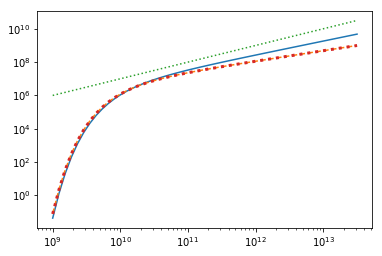

In [102]:
def HI_Hod(mhalo,aa):
    """Returns the 21cm "mass" for a box of halo masses."""
    zp1 = 1.0/aa
    zz  = zp1-1
    alp = 1.0
    alp = (1+2*zz)/(2+2*zz)
    mcut= 1e9*( 1.8 + 15*(3*aa)**8 )
    norm= 3e5*(1+(3.5/zz)**6)
    xx  = mhalo/mcut+1e-10
    mHI = xx**alp * np.exp(-1/xx)
    mHI*= norm
    print(alp, np.log10(mcut), np.log10(norm))
    return(mHI)

#                                                                                                                                                                                                                                                                                     
def HI_masscutfiddle(mhalo,aa):
    """Returns the 21cm "mass" for a box of halo masses."""
    zp1 = 1.0/aa
    zz  = zp1-1
    alp = 1.0
    alp = (1+2*zz)/(4+2*zz)
    mcut= 1e9*( 1.8 + 15*(3*aa)**8 )
    norm= 3e5*(1+(3.5/zz)**6)
    xx  = mhalo/mcut+1e-10
    mHI = xx**alp * np.exp(-1/xx)
    mHI*= norm
    print(alp, np.log10(mcut), np.log10(norm))
    return(mHI)
    #                                                                                                                                                                                                                                                                                     
#     


mm = np.logspace(9, 13.5)
plt.plot(mm, HI_Hod(mm, 0.3333))
plt.plot(mm, HI_masscutfiddle(mm, 0.3333), '--')
plt.plot(mm, mm/1e3, ':')
plt.plot(mm, HIm(mm), ':', lw=3)

plt.loglog()

In [293]:
(0.91/0.017)**-1/0.91

0.02052892162782273

In [295]:
10**-1.43

0.03715352290971726



Sure, it makes sense to me why we would like to model the infall subhalo mass for HI.
We can then go the self similar way.
Looking at fig 1 of Frank's paper, and the first paragraph of section 2, it seems that the \f~0.02 for us.
However Raul quotes 0.037 in the second paragraph of section 3.2.
They also say that it is independent of redshift, but I find that to be inconsistent with their values of A in the legend of figure 1.
To be conservative, I would rather take the fraction to be 0.0, so M1 = 0.03Mh and make it slightly redshift
dependent so that higher redshifts have more substructure.




# Normalization of satellites

In [123]:
dpath = '/project/projectdirs/m3127/H1mass/'
# dpath = '../data/'

bs, nc = 256, 128
# sim = '/lowres/%d-9100-fixed'%256
sim = '/highres/%d-9100-fixed'%2560
aafiles = np.array([0.1429, 0.1538, 0.1667, 0.1818, 0.2000, 0.2222, 0.2500, 0.2857, 0.3333])
zzfiles = np.array([round(tools.atoz(aa), 2) for aa in aafiles])

hpos, hmass, h1mass = {}, {}, {}
cpos, cmass, ch1mass = {}, {}, {}
spos, smass, sh1mass = {}, {}, {}
chid, shid = {}, {}
# halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
# hmass, h1mass = halos["Mass"].compute(), halos['H1mass'].compute()

for i, aa in enumerate(aafiles):
    zz = zzfiles[i]
    print(zz)
    halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
    hmass[zz] = halos["Mass"].compute()
    hpos[zz] = halos['Position'].compute()
    
    
dmesh, pkm = {}, {}
start = time()
for iz, zz in enumerate(zzfiles):
    #measure power                                                                                                                                                          
    dmesh[zz] = BigFileMesh(dpath + sim + '/fastpm_%0.4f/'%aafiles[iz] + '/dmesh_N%04d'%nc, '1').paint()
    pk = FFTPower(dmesh[zz]/dmesh[zz].cmean(), mode='1d').power
    k, pkm[zz] = pk['k'], pk['power']



6.0
5.5
5.0
4.5
4.0
3.5
3.0
2.5
2.0


In [124]:


bias_table = []
n = 6

for iz, zz in enumerate(zzfiles):
    aa = aafiles[iz]
    bias_table.append(np.loadtxt(dpath + sim + '/fastpm_%0.4f/halobias_bins.txt'%aa).T)
    
btable = np.array(bias_table)


In [125]:
# aa = 1/6
# alpha = -0.9
# mcut= 1e9*( 1.8 + 15*(3*aa)**8 )
# mh = np.logspace(9, 13)
# mmax = mh/10.
# mmin = 0.1*mcut + 0*mh

# def mtotsat(m1, mh=mh, mmin=mmin, mmax=mmax, alpha=alpha):
#     mask = mmin > mmax/2
#     mmin[mask] = mmax[mask]/2
#     return -alpha * (mmin/m1)**-alpha * mh**-alpha * (mmax**(alpha + 1) - mmin**(alpha + 1))/(alpha + 1) 

# mtot = mtotsat(mcut)

# plt.plot(mh, mtot/mh)
# plt.xscale('log')

In [126]:
mh = np.logspace(9, 14)
betaf = lambda zz: (1+2*zz)/(2+2*zz)
mcutf = lambda zz : 1e9*( 1.8 + 15*(3/(zz+1))**8 )
normf = lambda zz : 3e5*(1+(3.5/zz)**6)


def nsat(f, mh, alpha, mmin=None, mcut=None):
    if mmin == None and mcut==None:
        print('Give mmnin of satellites')
        return None
    elif mcut is not None: mmin = 0.1*mcut + 0*mh
    return (mmin/f/mh)**alpha - (0.1/f)**alpha


def mtotsat2(f, mh, alpha, mmax=None, mmin=None, mcut=None):
    if mmin == None and mcut==None:
        print('Give mmnin of satellites')
        return None
    elif mcut is not None: mmin = 0.1*mcut + 0*mh
    if mmax is None: mmax = mh/10.

    if type(mh) == np.ndarray:
        mask = mmin > mmax/2
        mmin[mask] = mmax[mask]/2
        return -alpha/(alpha+1)/f**alpha *((mmax/mh)**(alpha + 1) - (mmin/mh)**(alpha + 1))*mh
    else:
        return -alpha/(alpha+1)/f**alpha *((mmax/mh)**(alpha + 1) - (mmin/mh)**(alpha + 1))*mh

    


def mtotsat(f, mh, alpha, mmax=None, mmin=None, mcut=None):
    if type(mh) is not np.ndarray: mh = np.array(mh).reshape(-1)
    if mmin is None :
        if mcut is None :
            print('Give mmnin of satellites')
            return None
        elif mcut is not None: mmin = 0.1*mcut + 0*mh
    elif type(mmin) is not np.ndarray:  mmin = mmin + 0*mh
    if mmax is None: mmax = mh/10.
    mmin[mmin > mmax] = mmax[mmin > mmax]


    fac = -alpha/f**alpha/mh**alpha    

    toret = np.zeros_like(mh)
    for i in range(toret.size):
        mm = np.logspace(np.log10(mmin[i]), np.log10(mmax[i]), 1000)
        y = mm**(alpha )
        toret[i] = fac[i] * np.trapz(y, mm)
    return toret
    

    


def mtotsatHI(f, mh, mcut, beta, A, alpha, mmax=None, mmin=None, mcutp=1.0):
    if type(mh) is not np.ndarray: mh = np.array(mh).reshape(-1)
    if mmin is None :
        if mcut is None :
            print('Give mmnin of satellites')
            return None
        elif mcut is not None: mmin = 0.1*mcut + 0*mh
    elif type(mmin) is not np.ndarray:  mmin = mmin + 0*mh
    if mmax is None: mmax = mh/10.
    elif type(mmax) is not np.ndarray:  mmax = mmax*(mh/10.>mmax)
    mmin[mmin > mmax] = mmax[mmin > mmax]
    
    toret = np.zeros_like(mh)
    fac = -alpha/f**alpha/mh**alpha *A/mcut**beta
    for i in range(toret.size):
        mm = np.logspace(np.log10(mmin[i]), np.log10(mmax[i]), 1000)
        y = mm**(alpha + beta - 1)* np.exp(-(mcut/mm)**mcutp)
        toret[i] = fac[i] * np.trapz(y, mm)
    return toret



def mtotsatHIexp(f, mh, mcut, beta, A, alpha, mmax=None, mmin=None, mcutp=1.0):
    if type(mh) is not np.ndarray: mh = np.array(mh).reshape(-1)
    if mmin is None :
        if mcut is None :
            print('Give mmnin of satellites')
            return None
        elif mcut is not None: mmin = 0.1*mcut + 0*mh
    elif type(mmin) is not np.ndarray:  mmin = mmin + 0*mh
    if mmax is None: mmax = mh/10.
    elif type(mmax) is not np.ndarray:  mmax = mmax*(mh/10.>mmax)
    mmin[mmin > mmax] = mmax[mmin > mmax]
    
    toret = np.zeros_like(mh)
    fac = -alpha/f**alpha/mh**alpha *A/mcut**beta
    for i in range(toret.size):
        mm = np.logspace(np.log10(mmin[i]), np.log10(mmax[i]), 1000)
        y = mm**(alpha + beta - 1)
        toret[i] = fac[i] * np.trapz(y, mm)
    return toret

def mtotsatHI2(f, mh, mcut, beta, A, alpha, mmax=None, mmin=None, mcutp=1.0):

    mh = mh.reshape(-1, 1)
    mmin = 0.1*mcut
    mmax = mh/10.
    #mmin[mmin > mmax] = mmax[mmin > mmax]
    
    fac = -alpha/f**alpha/mh**alpha *A/mcut**beta
    #mmax = mh.reshape(1, -1)/10
    mmaxint = mh.max()/10.
    mm = np.logspace(np.log10(mmin), np.log10(mmaxint), 200).reshape(1, -1)
    mask = mm <= mmax
#     print(mask.sum(axis=-1))
#     print(mask)
    y = (mm**(alpha + beta - 1)* np.exp(-(mcut/mm)**mcutp))*mask
    toret = fac.reshape(1, -1) * simps(y, np.squeeze(mm), axis=1) 
    return toret.flatten()




/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide


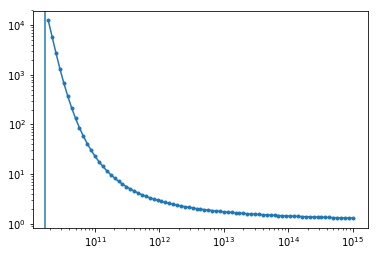

In [127]:
zz = 2
f = 0.03
alpha = -0.8
mh = np.logspace(9, 15, 100)
mcut = mcutf(zz)
beta = betaf(zz)
norm = normf(zz)

plt.plot(mh, mtotsatHIexp(f, mh, mcut, beta, norm, alpha)/mtotsatHI(f, mh, mcut, beta, norm, alpha), marker='.')
plt.loglog()
# plt.xscale('log')
plt.axvline(mcut)
# plt.axvline(mcut*10, ls="--")
# plt.axhline(1)
# plt.ylim(0.9, 1.1)
# plt.grid()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:72: RuntimeWarning: divide by zero encountered in log10
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/numpy/core/function_base.py:117: RuntimeWarning: invalid value encountered in double_scalars
  delta = stop - start
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:73: RuntimeWarning: divide by zero encountered in power
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:73: RuntimeWarning: divide by zero encountered in true_divide
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:73: RuntimeWarning: invalid value encountered in multiply
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide


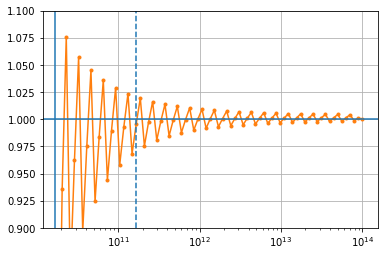

In [128]:
zz = 2
f = 0.03
alpha = -0.8
mh = np.logspace(9, 14, 100)
mcut = mcutf(zz)
beta = betaf(zz)
norm = normf(zz)

plt.plot(mh, mtotsatHI(f, mh, mcut, beta, norm, alpha, mmax=mcut)/mtotsatHI(f, mh, mcut, beta, norm, alpha), marker='.')
plt.plot(mh, mtotsatHI2(f, mh, mcut, beta, norm, alpha)/mtotsatHI(f, mh, mcut, beta, norm, alpha), marker='.')
# plt.loglog()
plt.xscale('log')
plt.axvline(mcut)
plt.axvline(mcut*10, ls="--")
plt.axhline(1)
plt.ylim(0.9, 1.1)
plt.grid()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:72: RuntimeWarning: divide by zero encountered in log10
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:73: RuntimeWarning: divide by zero encountered in power
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:73: RuntimeWarning: divide by zero encountered in true_divide
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:73: RuntimeWarning: invalid value encountered in multiply
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide


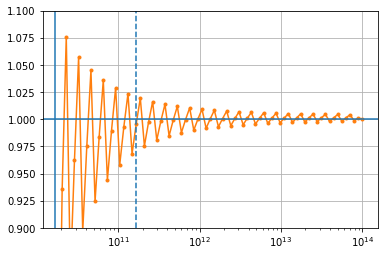

In [129]:
zz = 2
f = 0.03
alpha = -0.8
mh = np.logspace(9, 14, 100)
mcut = mcutf(zz)
beta = betaf(zz)
norm = normf(zz)

plt.plot(mh, mtotsatHI(f, mh, mcut, beta, norm, alpha, mmax=mcut)/mtotsatHI(f, mh, mcut, beta, norm, alpha), marker='.')
plt.plot(mh, mtotsatHI2(f, mh, mcut, beta, norm, alpha)/mtotsatHI(f, mh, mcut, beta, norm, alpha), marker='.')
# plt.loglog()
plt.xscale('log')
plt.axvline(mcut)
plt.axvline(mcut*10, ls="--")
plt.axhline(1)
plt.ylim(0.9, 1.1)
plt.grid()

In [130]:
%timeit mtotsatHI(f, mh, mcut, beta, norm, alpha)
%timeit mtotsatHI2(f, mh, mcut, beta, norm, alpha)

27.4 ms ± 240 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
707 µs ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
start = time()
sathmass = np.zeros_like(hmass[zz])

index = 0 
for i in range(shid[zz].size):
    sathmass[shid[zz][i]] +=  smass[zz][i]
print(time() - start)

In [36]:

mtotsatHI(f, mh, mcut, beta, norm, alpha)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.59899631e+00, 1.45757465e+01,
       8.46098280e+01, 3.65328101e+02, 1.25477046e+03, 3.59411748e+03,
       8.90433017e+03, 1.96349116e+04, 3.94180844e+04, 7.33457474e+04,
       1.28302698e+05, 2.13395574e+05, 3.40517461e+05, 5.25088595e+05,
       7.87017313e+05, 1.15193352e+06, 1.65275964e+06, 2.33170092e+06,
       3.24275896e+06, 4.45489917e+06, 6.05603657e+06, 8.15804587e+06,
       1.09030531e+07, 1.44713305e+07, 1.90911946e+07, 2.50514086e+07,
       3.27167093e+07, 4.25472354e+07, 5.51228192e+07, 7.11733439e+07,
       9.16166559e+07, 1.17605888e+08, 1.50588496e+08, 1.92379879e+08,
       2.45255126e+08, 3.12063314e+08, 3.96369833e+08, 5.02633539e+08,
       6.36427155e+08, 8.04711393e+08, 1.01617576e+09, 1.28166209e+09,
       1.61469079e+09, 2.03211433e+09])

In [324]:

aafiles = np.array([0.1429, 0.1538, 0.1667, 0.1818, 0.2000, 0.2222, 0.2500, 0.2857, 0.3333])
zzfiles = np.array([round(tools.atoz(aa), 2) for aa in aafiles])

def nmsat(m, mh, f, alpha):
    return -alpha * m**(alpha-1) / (f*mh)**alpha

def nsattot(mh, f, alpha, mmin, mmax=None):
    if type(mh) is not np.ndarray: mh = np.array(mh).reshape(-1)
    if mmax is None: mmax = mh/10.
    if type(mmin) is not np.ndarray:  mmin = mmin + 0*mh
    mmin[mmin > mmax] = mmax[mmin > mmax]
    
    toret = np.zeros_like(mh)
    for i in range(toret.size):
        mm = np.logspace(np.log10(mmin[i]), np.log10(mmax[i]), 100000)
        y = nmsat(mm, mh[i], f, alpha)
        toret[i] = simps(y, mm)
    toret[np.isnan(toret)] = 0
    return toret


def HIm(mhalo, mcut, beta, A, mcutp=1.0):
    """Returns the 21cm "mass" for a box of halo masses."""
    xx  = mhalo/mcut+1e-10
    mHI = xx**beta * np.exp(-1/xx**mcutp)
    mHI*= A
    return(mHI)



def massweightedsum(mh, mmin, numf, massf):
    if type(mh) is not np.ndarray: mh = np.array(mh).reshape(-1)
    if type(mmin) is not np.ndarray:  mmin = mmin + 0*mh
    mmax = mh/10.
    mmin[mmin > mmax] = mmax[mmin > mmax]
    
    toret = np.zeros_like(mh)
    for i in range(toret.size):
        mm = np.logspace(np.log10(mmin[i]), np.log10(mmax[i]), 1000)
        y = numf(mm, mh[i]) * massf(mm)
        toret[i] = np.trapz(y, mm)
    return toret





In [328]:
# # numf = lambda m, mh : -alpha * m**(alpha-1)/(f*mh)**alpha
# numf = lambda m, mh: nmsat(m, mh, f, alpha)
# massf = lambda m : HIm(m, mcut, beta, A)
# tmp = mtotsatHI(f, mh, mcut, beta, A, alpha, )
# tmp2 = massweightedsum(mh, mmin=mcut/10., numf=numf, massf=massf)
# tmp/tmp2

In [329]:

# ff = 0.02
# alpha = -0.9
# mh = np.logspace(9, 13.2)

# for im, mm in enumerate(np.logspace(9, 15, 7)):
#     mtots = []
#     for iz, zz in enumerate(zzfiles):
#         mcut= mcutf(zz)
#         mtot = mtotsat2(0.03, mm, alpha,  mmin=mm/1e4)
#         mtots.append(mtot)
#     plt.plot(zzfiles, np.array(mtots)/mm, 'k')

#     mtots = []
#     for iz, zz in enumerate(zzfiles):
#         mcut= mcutf(zz)
#         mtot = mtotsat(ff*(1+0.3*zz), mm, alpha,  mmin=mm/1e4)
# #         mtot = mtotsat(ff*(1+0.25*zz), mm, alpha,  mmin=mcut*0.1)
#         mtots.append(mtot)
#     plt.plot(zzfiles, np.array(mtots)/mm, 'C%d--'%im, marker='o', lw=3, alpha=0.8, label='Mh=%0.e'%mm)

# # plt.xscale('log')
# plt.legend(ncol=2)
# # plt.ylim(-0.05, 0.3)
# plt.grid()
# plt.xlabel('z')
# plt.ylabel('f_subhalo')


In [330]:
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp1d

def getfun(pts, k=2):
    xx = np.array([i[0] for i in pts])
    yy = np.array([i[1] for i in pts])
    args = np.argsort(xx)
    return ius(xx[args], yy[args], k=k)
#     return interp1d(xx[args], yy[args])

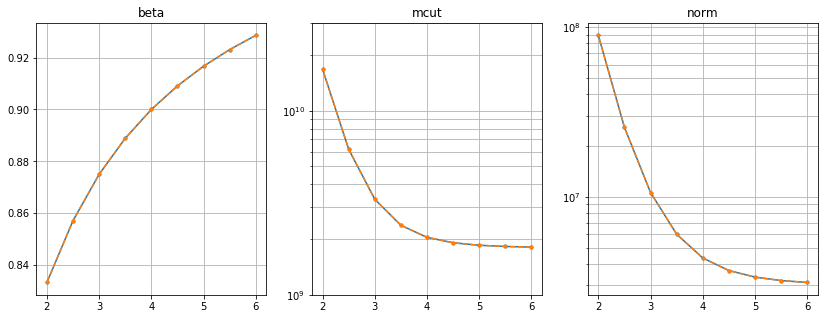

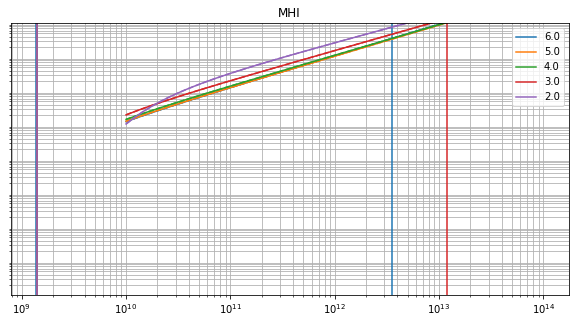

In [331]:


# betaf2 = lambda zz: (1+3*zz)/(4+3*zz)
# betaf2 = lambda zz: getfun([[6, 0.87], [4, 0.84], [2, 0.75]])(zz)
# betaf2 = lambda zz: betaf(zz)/(1 + 0.3/zz)/1.2
betaf2 = lambda zz: betaf(zz)
# betaf2 = lambda zz: (1+0*zz)

mcutf2 = lambda zz : mcutf(zz)
# mcutf2 = lambda zz : getfun([[6, 1e9], [3, 3e9], [4, 2e9], [2, 3e10]], k=3)(zz)
# mcutf2 = lambda zz : 10**9.*(1. + 10*(2.5/(zz+1))**10 )

normf2 = lambda zz : normf(zz)

fig, axar = plt.subplots(1,3 , figsize = (14, 5))
ax = axar.flatten()
ax[0].plot(zzfiles, betaf(zzfiles), marker='.')
ax[0].plot(zzfiles, betaf2(zzfiles), '--', marker='.')
ax[0].set_title('beta')
ax[1].plot(zzfiles, mcutf(zzfiles), marker='.')
ax[1].plot(zzfiles, mcutf2(zzfiles), '--', marker='.')
ax[1].set_yscale('log')
ax[1].set_title('mcut')
ax[1].set_ylim(1e9, 3e10)
ax[2].plot(zzfiles, normf(zzfiles), marker='.')
ax[2].plot(zzfiles, normf2(zzfiles), '--', marker='.')
ax[2].set_yscale('log')
ax[2].set_title('norm')
for axis in axar.flatten(): axis.grid(which='both')
plt.show()

plt.figure(figsize = (10, 5))
for iz, zz in enumerate(zzfiles[::2]): 
    plt.plot(mh, HIm(mh, mcutf(zz), betaf(zz), normf(zz) ), 'C%d'%iz, label=zz)
    plt.plot(mh, HIm(mh, mcutf2(zz), betaf2(zz), normf2(zz) ), 'C%d--'%iz)
    plt.axvline(btable[iz, 1][-1], color='C%d'%iz)
    plt.axvline(btable[iz, 1][0], color='C%d'%iz)
plt.grid(which='both')
plt.loglog('log')
plt.ylim(1e2, 1e10)
plt.title('MHI')
plt.legend()
plt.show()

Constraints
- match Paco-Ema plot of HI
- DM mass fraction in satellites <20%
- HI_halo >= HI_cen + HI_sat
- get bias=2 at z=2, and relatively flat

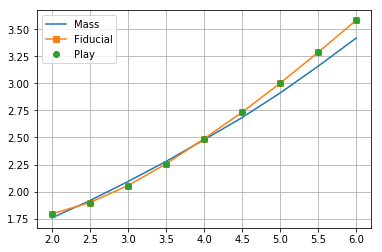

In [336]:
bmass = [((btable[i, 5]*btable[i, 1]*btable[i, 2]).sum()/(btable[i, 1]*btable[i, 2]).sum()) for i in range(9)]

bmh1f, bmh1 = [], []
for iz, zz in enumerate(zzfiles[:]):
    beta = betaf2(zz)
    mcut= mcutf2(zz)
    norm= normf2(zz)
    num = (btable[iz, 5]*HIm(btable[iz, 1],  mcut=mcut, beta=beta, A=norm)*btable[iz, 2]).sum()
    den = (HIm(btable[iz, 1],  mcut=mcut, beta=beta, A=norm)*btable[iz, 2]).sum()
    bmh1.append(num/den)

    beta = betaf(zz)
    mcut= mcutf(zz)
    norm= normf(zz)
    num = (btable[iz, 5]*HIm(btable[iz, 1],  mcut=mcut, beta=beta, A=norm)*btable[iz, 2]).sum()
    den = (HIm(btable[iz, 1],  mcut=mcut, beta=beta, A=norm)*btable[iz, 2]).sum()
    bmh1f.append(num/den)

    
plt.plot(zzfiles, bmass, label='Mass')
plt.plot(zzfiles, bmh1f, marker='s', label='Fiducial')
plt.plot(zzfiles, bmh1, 'o', label='Play')
plt.grid()
plt.legend()

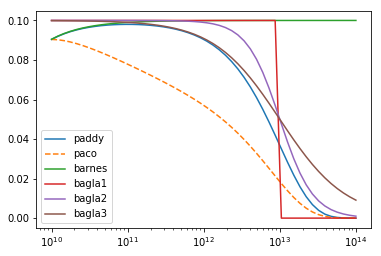

In [333]:

def paddy(m, mlow=1e9, mhigh=1e13, f=0.1, alpha=1):
    return f*m**alpha * np.exp(-mlow/m)*np.exp(-m/mhigh)

def bagla1(m, f=0.1, mlow=1e9, mhigh=1e13):
    return f*m *(m>mlow)*(m<mhigh)

def bagla2(m, f=0.1, mlow=1e9, mhigh=1e13):
    return f*m *(m>mlow)*1/(1+ (m/mhigh)**2)

def bagla3(m, f=0.1, mlow=1e9, mhigh=1e13):
    return f*m *(m>mlow)*1/(1+ m/mhigh)

def paco(m, alpha=1, f=0.1, mlow=1e9, mhigh=1e13):
    return f*m **alpha*np.exp(-mlow/m)

plt.plot(mh, paddy(mh)/mh, label='paddy')
plt.plot(mh, paddy(mh, alpha=0.9, f=1)/mh, '--', label='paco')
plt.plot(mh, paddy(mh, mhigh=1e20)/mh, label='barnes')
plt.plot(mh, bagla1(mh)/mh, label='bagla1')
plt.plot(mh, bagla2(mh)/mh, label='bagla2')
plt.plot(mh, bagla3(mh)/mh, label='bagla3')
# plt.plot(mh, HIm(mh)/mh, label='bagla3')
plt.xscale('log')
plt.legend()

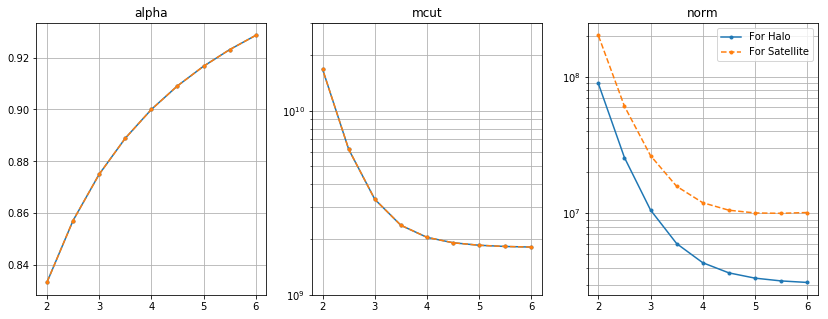

In [334]:
# betaf2 = lambda zz: betaf(zz)*0 + 1
# mcutf2 = lambda zz : mcutf(zz)/(1 + 0.2*zz)
betaf2 = lambda zz: betaf(zz)
mcutf2 = lambda zz : mcutf(zz)
normf2 = lambda zz : normf(zz)*(1.75 + 0.25*zz)

fig, axar = plt.subplots(1,3 , figsize = (14, 5))
ax = axar.flatten()
ax[0].plot(zzfiles, betaf(zzfiles), marker='.')
ax[0].plot(zzfiles, betaf2(zzfiles), '--', marker='.')
ax[0].set_title('alpha')
ax[1].plot(zzfiles, mcutf(zzfiles), marker='.')
ax[1].plot(zzfiles, mcutf2(zzfiles), '--', marker='.')
ax[1].set_yscale('log')
ax[1].set_title('mcut')
ax[1].set_ylim(1e9, 3e10)
ax[2].plot(zzfiles, normf(zzfiles), marker='.', label='For Halo')
ax[2].plot(zzfiles, normf2(zzfiles), '--', marker='.', label='For Satellite')
ax[2].set_yscale('log')
ax[2].set_title('norm')
plt.legend()
for axis in axar.flatten(): axis.grid(which='both')
plt.show()


In [335]:
# for iz, zz in enumerate(zzfiles):
#     beta = betaf(zz)
#     mcut = mcutf(zz)
#     norm = normf(zz)
#     tmp = HIm(mh, mcut, beta, norm)
# #     plt.plot(mh, HIm(mh, mcut, beta, norm), 'C%d:'%iz)
    
#     beta2 = betaf2(zz)
#     mcut2 = mcutf2(zz)
#     norm2 = normf2(zz)
#     tmp2 = paddy(mh, mlow=mcut2, mhigh=1e12, f=0.0005)
#     plt.plot(mh, tmp2/tmp, label=zz)
# #     plt.plot(mh, HIm(mh, mcut2, beta2, norm2), 'C%d--'%iz)
# #     plt.plot(mh, paddy(mh, mlow=mcut2, mhigh=1e12, f=0.0005),  'C%d'%iz)
    
# plt.xscale('log')
# plt.ylim(0, 10)
# plt.legend()

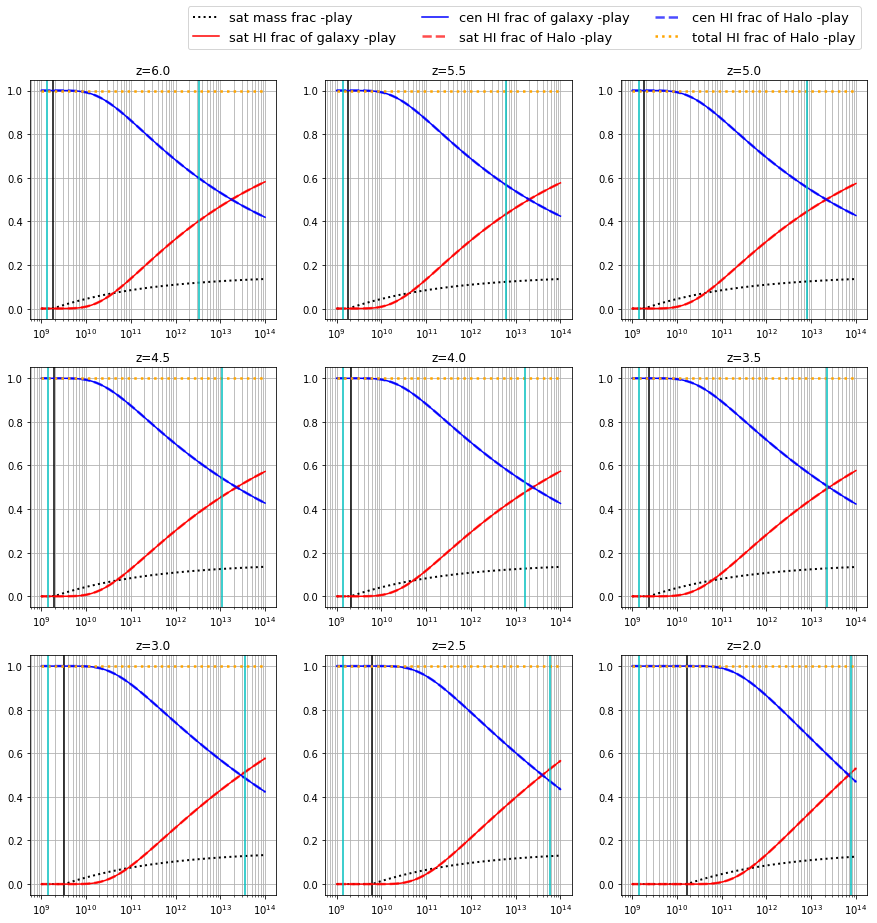

In [195]:

fig, ax = plt.subplots(3, 3, figsize = (15, 15))
# fig2, ax2 = plt.subplots()

f = 0.03
alpha = -0.8
mh = np.logspace(9, 14)

for iz, zz in enumerate(zzfiles[::]):

    axis = ax.flatten()[iz]
    aa = 1/(zz+1)

    beta = betaf(zz)
    mcut = mcutf(zz)
    norm = normf(zz)
    numf = lambda m, mm: nmsat(m, mm, f, alpha)
    mtot = massweightedsum(mh, mmin=mcut/10., numf=numf, massf= lambda m: m)
#     mtotsat(f, mh, alpha, mcut=mcut)
    mHIhalo = HIm(mh, mcut=mcut, beta=beta, A=norm)
#     mHIsat = mtotsatHI(f, mh, mcut=mcut, beta=beta, A=norm, alpha=alpha) 
#     mHIcen = HIm(mh-mtot, mcut=mcut, beta=beta, A=norm)
# #     mHIcen = mHIhalo - mHIsat
    
#     axis.plot(mh, mtot/mh, 'k:', lw=1.5, label='sat mass frac -fid')
# #     axis.plot(mh, mHIsat/(mHIcen+mHIsat), 'm', lw=1.2, label='sat HI frac of galaxy -fid')
# #     axis.plot(mh, mHIcen/(mHIcen+mHIsat), 'g', lw=1.2, label='cen HI frac of galaxy -fid')
#     axis.plot(mh, mHIsat/mHIhalo, 'm--', lw=1.5, alpha=0.7, label='sat HI frac of halo -fid')
#     axis.plot(mh, mHIcen/mHIhalo, 'g--', lw=1.5, alpha=0.7, label='cen HI frac of halo -fid')
#     axis.plot(mh, (mHIcen+mHIsat)/mHIhalo, 'c--', lw=1.5, alpha=0.7, label='total HI frac of Halo -play')
    
    
    ##
    beta2 = betaf2(zz)
    mcut2 = mcutf2(zz)
    norm2 = normf2(zz)
    axis.axvline(mcut2, color='k')
    
    numf = lambda m, mm: nmsat(m, mm, f, alpha)
    mtot = massweightedsum(mh, mmin=mcut2/10., numf=numf, massf= lambda m: m)
    massfhsat = lambda m: HIm(m, mcut2, beta2, norm2)
#     massfhcen = lambda m: HIm(m, mcut, beta, norm)
#     massfhsat = lambda m: paddy(m, mlow=mcut2, mhigh=1e14, f=0.01, alpha=beta2)
#     massfhcen = lambda m: paddy(m, mlow=mcut, mhigh=1e14, f=0.0009, alpha=beta)
    
    mHIsat = massweightedsum(mh, mmin=mcut2/10., numf=numf, massf=massfhsat)
    mtmp = mtotsatHI(f, mh, mcut2, beta2, norm2, alpha)  
#     mHIcen = massfhcen(mh-mtot)
#     mHIcen = mHIhalo - mHIsat
    mHIcen = mHIhalo - mtmp
    
    axis.plot(mh, mtot/mh, 'k:', lw=2, label='sat mass frac -play')
    axis.plot(mh, mHIsat/(mHIcen+mHIsat), 'r', lw=1.5, label='sat HI frac of galaxy -play')
    axis.plot(mh, mHIcen/(mHIcen+mHIsat), 'b', lw=1.5, label='cen HI frac of galaxy -play')
    axis.plot(mh, mHIsat/mHIhalo, 'r--', lw=2.5, alpha=0.7, label='sat HI frac of Halo -play')
    axis.plot(mh, mHIcen/mHIhalo, 'b--', lw=2.5, alpha=0.7, label='cen HI frac of Halo -play')
    axis.plot(mh, (mHIcen+mHIsat)/mHIhalo, 'orange', ls=":", lw=2.5, alpha=1, label='total HI frac of Halo -play')
    
    axis.set_xscale('log')
    axis.set_title('z=%.1f'%zz)
    axis.axvline(btable[iz, 1][0], color='c')
    axis.axvline(btable[iz, 0][-1], color='c')
    axis.grid(which='both')

    

ax[0, 2].legend(loc='lower right', bbox_to_anchor=(1, 1.1), ncol=3, fontsize=13)
# ax2.loglog()


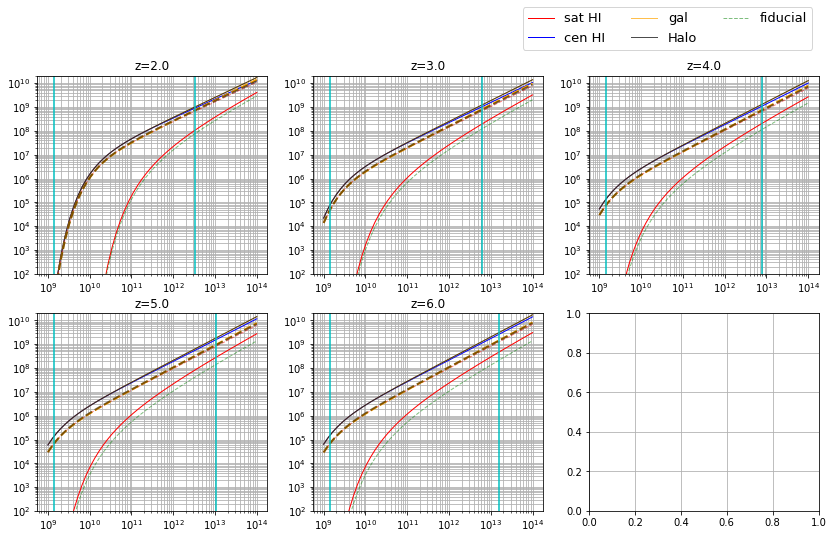

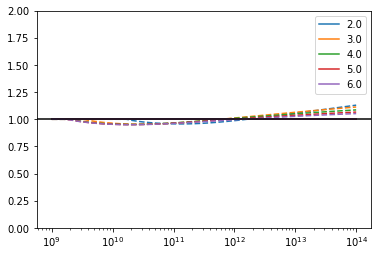

In [1048]:

fig, ax = plt.subplots(2, 3, figsize = (14, 8))
fig2, ax2 = plt.subplots()

for iz, zz in enumerate(zzfiles[::2][::-1]):
    aa = 1/(zz+1)
    beta = betaf2(zz)
    mcut= mcutf2(zz)
    norm= normf2(zz)

    axis = ax.flatten()[iz]

    mtot = mtotsat(f, mh, alpha, mcut=mcut)
    mHIhalo = HIm(mh, mcut=mcut, beta=beta, A=norm)
    mHIsat = mtotsatHI(f, mh, mcut=mcut, beta=beta, A=norm, alpha=alpha) 
    mHIcen = HIm(mh-mtot, mcut=mcut, beta=beta, A=norm)
    mHIcen = mHIhalo - mHIsat

    axis.plot(mh, mHIsat, 'r', lw=1, label='sat HI')
    axis.plot(mh, mHIcen, 'b', lw=1, label='cen HI')
    axis.plot(mh, mHIsat+mHIcen, 'orange', lw=1, alpha=0.7, label='gal')
    axis.plot(mh, mHIhalo, 'k', lw=1, alpha=0.7, label='Halo')
    ax2.plot(mh, (mHIsat+mHIcen)/mHIhalo, 'C%d'%iz, label=zz)
    
    beta = betaf(zz)
    mcut= mcutf(zz)
    norm= normf(zz)


    mtot = mtotsat(f, mh, alpha, mcut=mcut)
    mHIhalo = HIm(mh, mcut=mcut, beta=beta, A=norm)
    mHIsat = mtotsatHI(f, mh, mcut=mcut, beta=beta, A=norm, alpha=alpha) 
    mHIcen = HIm(mh-mtot, mcut=mcut, beta=beta, A=norm)
#     mHIcen = mHIhalo - mHIsat

    axis.plot(mh, mHIsat, 'g--', lw=1, alpha=0.5, label='fiducial')
    axis.plot(mh, mHIcen, 'r--', lw=1, alpha=0.5)
    axis.plot(mh, mHIsat+mHIcen, 'orange', ls="--", lw=2, label='')
    axis.plot(mh, mHIhalo, 'k--', lw=2, alpha=0.5)
    ax2.plot(mh, (mHIsat+mHIcen)/mHIhalo, 'C%d--'%iz)

    axis.set_xscale('log')
    axis.set_yscale('log')
    axis.set_title('z=%.1f'%zz)
    axis.set_ylim(1e2, 2e10)
    axis.axvline(btable[iz, 1][0], color='c')
    axis.axvline(btable[iz, 0][-1], color='c')

for axis in ax.flatten(): axis.grid(which='both')
ax[0, 2].legend(loc='lower right', bbox_to_anchor=(1, 1.1), ncol=3, fontsize=13)
ax2.set_xscale('log')
ax2.legend()
ax2.set_ylim(0, 2)
ax2.axhline(1, color='k')

In [ ]:
# # pm = ParticleMesh(BoxSize=bs, Nmesh = [nc, nc, nc])

# # bias = []
# # biasf = []
# # biasm = []
# # for iz, zz in enumerate(zzfiles[:]):
# #     print(zz)
# #     beta = betaf2(zz)
# #     mcut= mcutf2(zz)
# #     norm= normf2(zz)
# #     h1mass = HIm(hmass[zz], mcut=mcut, beta=beta, A=norm)
# #     h1mesh = pm.paint(hpos[zz], mass=h1mass)
# #     pkh = FFTPower(h1mesh/h1mesh.cmean(), mode='1d').power['power']
# #     bias.append(((pkh[1:6]/pkm[zz][1:6])**0.5 ).mean())
    
# #     hmesh = pm.paint(hpos[zz], mass=hmass[zz])
# #     pkh = FFTPower(hmesh/hmesh.cmean(), mode='1d').power['power']
# #     biasm.append(((pkh[1:6]/pkm[zz][1:6])**0.5 ).mean())
    
# #     beta = betaf(zz)
# #     mcut= mcutf(zz)
# #     norm= normf(zz)
# #     h1mass = HIm(hmass[zz], mcut=mcut, beta=beta, A=norm)
# #     h1mesh = pm.paint(hpos[zz], mass=h1mass)
# #     pkh = FFTPower(h1mesh/h1mesh.cmean(), mode='1d').power['power']
# #     biasf.append(((pkh[1:6]/pkm[zz][1:6])**0.5 ).mean())


# plt.plot(zzfiles, biasm, marker='o')
# plt.plot(zzfiles, bias, 'o', ms=8)
# plt.plot(zzfiles, biasf, 's', alpha=0.5)
# plt.grid()

## Get bias

In [ ]:



project = '/project/projectdirs/m3127/H1mass/'
bs, nc = 256, 256
# sim = '/lowres/%d-9100-fixed'%256
sim = '/highres/%d-9100-fixed'%2560
aafiles = np.array([0.1429, 0.1538, 0.1667, 0.1818, 0.2000, 0.2222, 0.2500, 0.2857, 0.3333])
zzfiles = np.array([round(tools.atoz(aa), 2) for aa in aafiles])

bias_int = []
bias_table = []
n = 6

for iz, zz in enumerate(zzfiles):
    aa = aafiles[iz]
    pkm = np.loadtxt(project + sim + '/fastpm_%0.4f/pkm.txt'%aa)[:, 1]
    pkhp = np.loadtxt(project + sim + '/fastpm_%0.4f/pkhpos.txt'%aa)[:, 1]
    pkhm = np.loadtxt(project + sim + '/fastpm_%0.4f/pkhmass.txt'%aa)[:, 1]
    pkhmx = np.loadtxt(project + sim + '/fastpm_%0.4f/pkhmassxm.txt'%aa)[:, 1]
    pkhpx = np.loadtxt(project + sim + '/fastpm_%0.4f/pkhposxm.txt'%aa)[:, 1]
    biases = [(pkhm[1:n]/pkm[1:n]).mean()**0.5, (pkhp[1:n]/pkm[1:n]).mean()**0.5, (pkhmx[1:n]/pkm[1:n]).mean(), (pkhpx[1:n]/pkm[1:n]).mean()]
    bias_int.append(biases)
    bias_table.append(np.loadtxt(project + sim + '/fastpm_%0.4f/halobias_bins.txt'%aa).T)
    
bias_int = np.array(bias_int)
bias_table = np.array(bias_table)

bias_large = []
for iz, zz in enumerate(zzfiles):
    aa = aafiles[iz]
    pkm = np.loadtxt(project + sim + '/fastpm_%0.4f/pkm.txt'%aa)[:, 1]
    pkhp = np.loadtxt(project + sim + '/fastpm_%0.4f/pkhpos.txt'%aa)[:, 1]
    pkhm = np.loadtxt(project + sim + '/fastpm_%0.4f/pkhmass.txt'%aa)[:, 1]
    pkhmx = np.loadtxt(project + sim + '/fastpm_%0.4f/pkhmassxm.txt'%aa)[:, 1]
    pkhpx = np.loadtxt(project + sim + '/fastpm_%0.4f/pkhposxm.txt'%aa)[:, 1]
    biases = [(pkhm[1:n]/pkm[1:n]).mean()**0.5, (pkhp[1:n]/pkm[1:n]).mean()**0.5, (pkhmx[1:n]/pkm[1:n]).mean(), (pkhpx[1:n]/pkm[1:n]).mean()]
    bias_int.append(biases)
    bias_table.append(np.loadtxt(project + sim + '/fastpm_%0.4f/halobias_bins.txt'%aa).T)


In [14]:
from scipy.integrate import simps

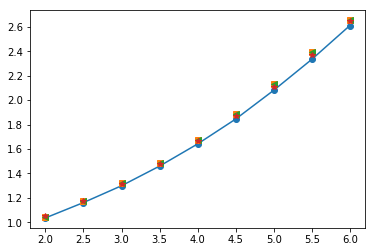

In [15]:
i = 1
ib = 4
def biashodfun(b, numwt, numx, denwt=None, denx=None):
    if denwt is None: denwt = numwt
    if denx is None: denx = numx
    return simps(b*numwt, numx) / simps(denwt, denx)

bt = bias_table

biashod = np.array([biashodfun(bt[j, ib], bt[j,2]/bt[j,0], bt[j, 0]) for j in range(zzfiles.size)])
biashod2 = np.array([biashodfun(bt[j, ib], bt[j, 2], np.log(bt[j, 0])) for j in range(zzfiles.size)])
biassum = np.array([(bt[j,ib]*bt[j,2]).sum()/(bt[j,2]).sum() for j in range(zzfiles.size)])

plt.plot(zzfiles, bias_int[:, i], marker='o')
plt.plot(zzfiles, biashod, 's')
plt.plot(zzfiles, biashod2, '<')
plt.plot(zzfiles, biassum, '*')


In [122]:
i = 2
ib = 5
def biashodfun(b, numwt, numx, denwt=None, denx=None):
    if denwt is None: denwt = numwt
    if denx is None: denx = numx
    return simps(b*numwt, numx) / simps(denwt, denx)

bt = bias_table.copy()
biashod = np.array([biashodfun(bt[j, ib], bt[j, 2]*bt[j,1]**1, np.log10(bt[j, 0])) for j in range(zzfiles.size)])
biashod2 = np.array([biashodfun(bt[j, ib], bt[j, 2], np.log(bt[j, 0])) for j in range(zzfiles.size)])
# biashod3 = np.array([biashodfun(bt[j, ib], bt[j, 2]**1*bt[j,1], (bt[j, 0])) for j in range(zzfiles.size)])
biassum = np.array([(bt[j,ib]*bt[j,2]*bt[j,1]).sum()/(bt[j,2]*bt[j,1]).sum() for j in range(zzfiles.size)])
biassum2 = np.array([(bt[j,ib]*bt[j,2]*bt[j,1]**2).sum()/(bt[j,2]*bt[j,1]**2).sum() for j in range(zzfiles.size)])

plt.plot(zzfiles, bias_int[:, i], marker='o')
plt.plot(zzfiles, biashod, 's')
plt.plot(zzfiles, biashod2, '<')
# plt.plot(zzfiles, biashod3, '>')
plt.plot(zzfiles, biassum, '*')
# plt.plot(zzfiles, biassum2, marker='*')
# plt.plot(zzfiles, np.stack((biashod , biassum), axis=1).mean(axis=1), '*')
plt.grid()

NameError: name 'bias_table' is not defined

# Profile

## power law + exponential cutoff

In [24]:
from scipy.interpolate import RectBivariateSpline as rbspline
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
from scipy.integrate import simps

In [16]:
np.meshgrid(paramtablem0, paramtablezz)[0].shape, paramtabler0.shape

((6, 5), (6, 5))

In [17]:
paramtabler0 = []
paramtabler0.append([nan, -3.59, -2.8, -2.32, -1.71, -1.91])
# paramtabler0.append([-2.5, -3.72, -3.3, -2.32, -1.77, nan])
# paramtabler0.append([-3.2, -3.64, -2.75, -2.18, -1.74, nan])
paramtabler0.append([nan, -3.72, -3.3, -2.32, -1.77, nan])
paramtabler0.append([nan, -3.64, -2.75, -2.18, -1.74, nan])
paramtabler0.append([-3.63, -3.1, -2.52, -2.09, nan, nan])
paramtabler0.append([-3.3, -2.46, -2.32, -2.04, nan, nan])
paramtabler0.append([-2.9, -2.28, -2.18, -2.02, nan, nan])
paramtabler0 = np.array(paramtabler0)
# paramtabler0 = paramtabler0[:-1]
paramtabler0 = paramtabler0[:, :-1]
# 
paramtablezz = np.array([0, 1, 2, 3, 4, 5])
paramtablem0 = np.array([9, 10, 11, 12, 13])
coordinates = np.array([(x,y) for x in paramtablezz for y in paramtablem0 ])
vals = paramtabler0.flatten()
mask = np.isnan(vals)

# r0spline = griddata(coordinates[~mask], vals[~mask], (4, 11), )
ir0pow = interp2d(coordinates[:, 0][~mask], coordinates[:, 1][~mask], vals[~mask], kind='linear')


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,7 m=24 fp=0.002083 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [18]:
# plt.plot(paramtablem0, paramtabler0[5], 'o')
# plt.plot(paramtablezz, paramtabler0[:, 0], 'o')

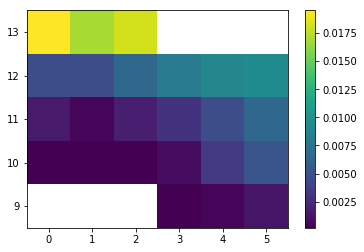

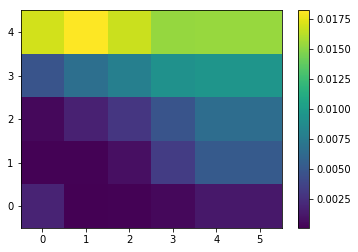

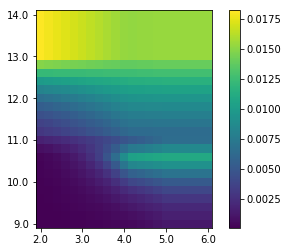

In [19]:
plt.imshow(10**paramtabler0.T, origin='lower')
plt.xticks(ticks=np.arange(6), labels=paramtablezz)
plt.yticks(ticks=np.arange(5), labels=paramtablem0)
plt.colorbar()
plt.show()

plt.imshow(10**ir0pow(np.arange(1, 7, 1), np.arange(9, 14, 1)), origin='lower')
# plt.imshow(ir0(coordinates[:, 0][~mask], coordinates[:, 1][~mask]), origin='lower')
# plt.xticks(ticks = np.arange(5), labels=paramtablezz)
plt.colorbar()
plt.show()

xx = np.arange(2, 6.1, 0.2)
yy = np.arange(9, 14.1, 0.2)
plt.imshow(10**ir0pow(xx, yy), origin='lower')
plt.xticks(ticks = np.arange(xx.size)[::5], labels=['%0.1f'%i for i in xx[::5]])
plt.yticks(ticks = np.arange(yy.size)[::5], labels=['%0.1f'%i for i in yy[::5]])
plt.colorbar()
plt.show()

In [124]:
def getrvir(m, z):
    '''https://halotools.readthedocs.io/en/latest/_modules/halotools/empirical_models/phase_space_models/analytic_models/halo_boundary_functions.html
    '''
#     rho_crit = 3 * 100**2 /(8 * math.pi * 43.007)
#     rho_crit *= 1e10 / cosmo.h**2
    rho_crit = cosmo.rho_crit(z)
    x = cosmo.Om(z) - 1.0
    delta = 18 * np.pi**2 + 82.0 * x - 39.0 * x**2
    rho = rho_crit * delta *1e10
    radius = (m * 3.0 / 4.0 / np.pi / rho)**(1.0 / 3.0)
    return radius *(1+z)
    
def nfw(r, m, z, c=7):
    rvir = getrvir(m, z)
    Rs = rvir/c
    mfac = 4*np.pi*Rs**3 *(np.log(1+c) - c/(1+c))
    rho0 = m/mfac
    r += 1e-5
    den = (r/Rs) * (1 + r/Rs)**2
    return rho0/den
#     return 1/den


def h1rhopowerlaw(r, m, z):
    alpha = 3
    r0 = ir0pow(z, np.log10(m))
    r0 = 10**r0
    rho = 1/(r+1e-5)**alpha * np.exp(-r0/(r+1e-5))
    return rho

def masspowlawexp(r, m, z, rho0=1):
    rho = rho0*h1rhopowerlaw(r, m, z)
#     scatter = np.random.normal(0, 0.1*np.log10(rho))
#     sample = rho + 10**abs(scatter)*np.sign(scatter)
    sample= rho #+ np.random.normal(0, 0.1*rho)
    n = nfw(r, m, z)
    return sample /n




No handles with labels found to put in legend.


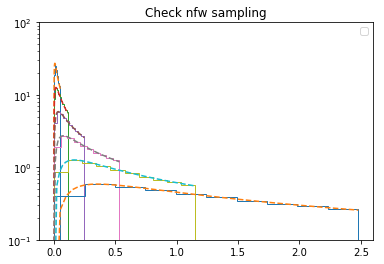

0.9995058388620428

In [131]:
zz = 3
for mm in np.logspace(10, 15, 6):
    rr = hod.sampleilogcdf(100000, hod.ilogcdfnfw())  
    rvir = getrvir(mm, zz)
    rr *= rvir
    plt.hist(rr, bins=10, histtype='step', density=True)
    rr = np.linspace(1e-4, rvir)
    nn = nfw(rr, mm, zz)
    plt.plot(rr, rr**2 * nn/np.trapz(rr**2 * nn, rr), '--')
#     print(rr[np.argmax(nfw(rr, mm, zz).max())])
#     plt.plot(rr, h1rhopowerlaw(rr, mm, zz), '.')
    
# plt.loglog()
plt.yscale('log')
plt.legend()
plt.ylim(1e-1, 1e2)
plt.title('Check nfw sampling')
plt.show()


mm = 1e13
rr = np.linspace(0, getrvir(mm, zz))
simps(4*np.pi*rr**2 *nfw(rr, mm, zz), rr)/mm

Text(0.5, 1.0, 'Check virial radius')

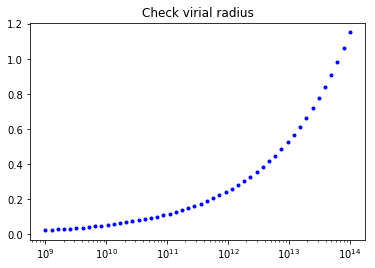

In [128]:
mh = np.logspace(9, 14)
for mm in mh:
    rvir = getrvir(mm, zz)
    plt.plot(mm, rvir, 'b.')
plt.xscale('log')
plt.title('Check virial radius')

Text(0.5, 1.0, 'Fraction outside 0.1rvir')

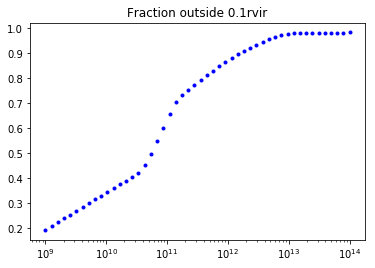

In [129]:
zz = 2
for mm in mh:
    rvir = getrvir(mm, zz)
    rr = np.linspace(0, rvir, 1000)
    rr1 = np.linspace(0.01, rvir, 1000)
#     rr1 = rr[100:]
    rhoh1all = h1rhopowerlaw(rr, mm, zz)
    rhoh1sat = h1rhopowerlaw(rr1, mm, zz)
    frac = simps(4*pi*rr1**2*rhoh1sat, rr1)/simps(4*pi*rr**2*rhoh1all, rr)
    plt.plot(mm, frac, 'b.')
plt.xscale('log')
plt.title('Fraction outside 0.1rvir')


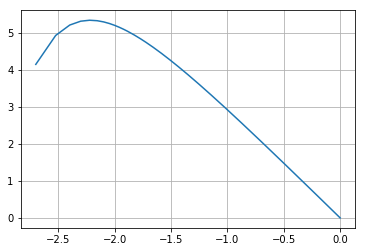

In [132]:
rho0 = 1e10
rr = np.linspace(10**-2.7, 1, 1000)
# plt.plot(rr, h1rho(rr, 1e13, 2, rho0=rho0))
plt.plot(np.log10(rr), np.log10(h1rhopowerlaw(rr, 1e13, 2)))
plt.grid()

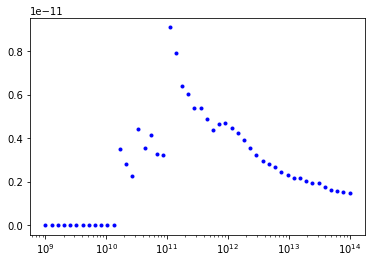

In [134]:
zz = 3
msat = []
nss = []
rhos = []
for m in mh:
    mcut = mcutf(zz)
    beta=betaf(zz)
    norm = normf(zz)

    #Halo properties
    mh1 = HIm(m, mcut, beta, A=norm)
    rvir = getrvir(m, zz)

    #normalization
    rr = np.linspace(0, rvir, 1000)
    h1 = 4*np.pi*rr**2 * h1rhopowerlaw(rr, m, zz)
    mh1unnorm = np.trapz(h1, rr)
    rho0 = mh1/mh1unnorm

    rhos.append(rho0)
    #sample satellites
    ns = int(nsattot(m, f=0.03, alpha=-0.8, mmin=mcut/10.))# int(nsat(f, m, alpha, mcut=mcut))
    nss.append(ns)
    sampling = []
    nsample = 10
    for i in range(nsample):
        rr = hod.sampleilogcdf(ns, hod.ilogcdfnfw())
        rr *= rvir
        msats = rho0*masspowlawexp(rr, m, zz)
        sampling.append(msats)
    msats = [i.sum() for i in sampling][0]/nsample
    #
    msat.append(msats)
    plt.plot(m, msats.sum()/mh1, 'b.')
plt.xscale('log')

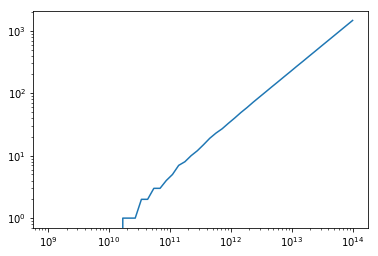

In [136]:
plt.plot(mh,  nss)
plt.yscale('log')
plt.xscale('log')

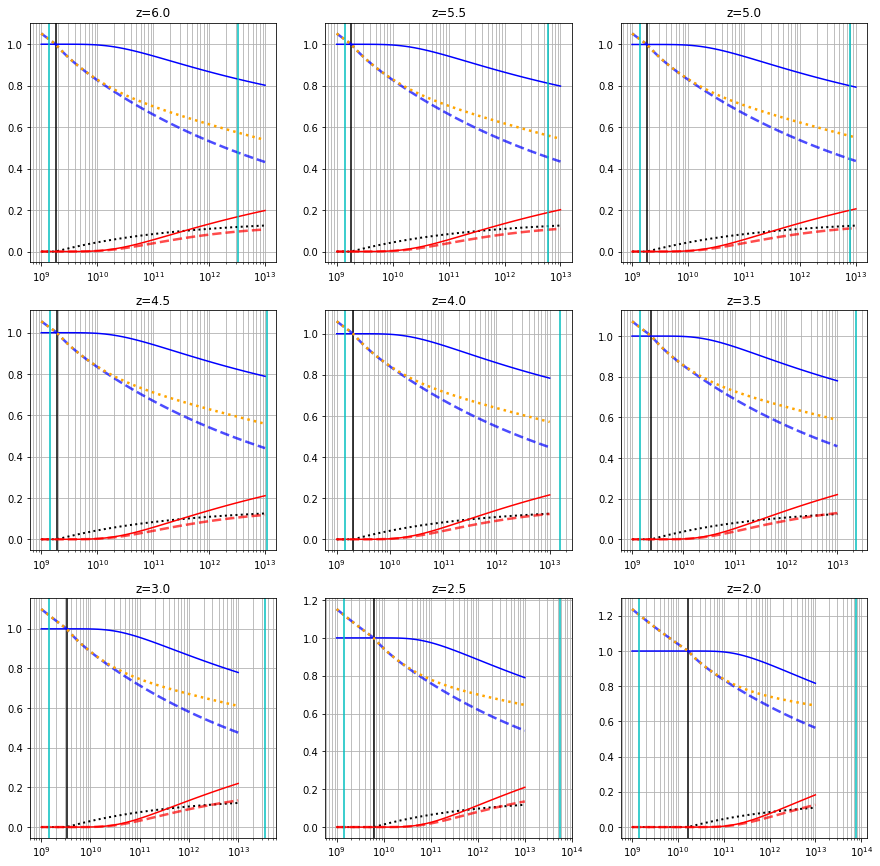

In [443]:


fig, ax = plt.subplots(3, 3, figsize = (15, 15))
# fig2, ax2 = plt.subplots()

f = 0.03
alpha = -0.8
mh = np.logspace(9, 13)

for iz, zz in enumerate(zzfiles[::]):

    axis = ax.flatten()[iz]
    aa = 1/(zz+1)

    beta = betaf(zz)
    mcut= mcutf(zz)
    norm= normf(zz)
    mtot = mtotsat(f, mh, alpha, mcut=mcut)
    mHIhalo = HIm(mh, mcut=mcut, beta=beta, A=norm)
 
    
    ##
    beta = betaf2(zz)
    mcut= mcutf2(zz)
    norm= normf2(zz)
    axis.axvline(mcut, color='k')
    
    mtot = mtotsat(f, mh, alpha, mcut=mcut)
    mHIsat = mtotsatHI(f, mh, mcut=mcut, beta=beta, A=norm, alpha=alpha) 
    mHIcen = HIm(mh-mtot, mcut=mcut, beta=beta, A=norm)
#     mHIcen = mHIhalo - mHIsat

    
    axis.plot(mh, mtot/mh, 'k:', lw=2, label='sat mass frac -play')
    axis.plot(mh, mHIsat/(mHIcen+mHIsat), 'r', lw=1.5, label='sat HI frac of galaxy -play')
    axis.plot(mh, mHIcen/(mHIcen+mHIsat), 'b', lw=1.5, label='cen HI frac of galaxy -play')
    axis.plot(mh, mHIsat/mHIhalo, 'r--', lw=2.5, alpha=0.7, label='sat HI frac of Halo -play')
    axis.plot(mh, mHIcen/mHIhalo, 'b--', lw=2.5, alpha=0.7, label='sat HI frac of Halo -play')
    axis.plot(mh, (mHIcen+mHIsat)/mHIhalo, 'orange', ls=":", lw=2.5, alpha=1, label='total HI frac of Halo -play')
    
    axis.set_xscale('log')
    axis.set_title('z=%.1f'%zz)
    axis.axvline(btable[iz, 1][0], color='c')
    axis.axvline(btable[iz, 0][-1], color='c')
    axis.grid(which='both')

    

# ax[0, 2].legend(loc='lower right', bbox_to_anchor=(1, 1.1), ncol=3, fontsize=13)
# ax2.loglog()


## Modified nfw

In [808]:
# 
paramtablezz = np.array([0, 1, 2, 3, 4, 5])
paramtablem0 = np.array([9, 10, 11, 12, 13])
coordinates = np.array([(x,y) for x in paramtablezz for y in paramtablem0 ])


paramtabler0n = []
paramtabler0n.append([nan, -3.8, -3.4, -3.1, -1.8, -2.6])
# paramtabler0n.append([nan, -3.8, nan, -3.1, -1.8, -2.6])

# paramtabler0.append([-2.5, -3.72, -3.3, -2.32, -1.77, nan])
# paramtabler0.append([-3.2, -3.64, -2.75, -2.18, -1.74, nan])
paramtabler0n.append([nan, -3.7, -3.6, -2.9, -2.4, nan])
paramtabler0n.append([nan, -3.5, -3.3, -2.6, -3.0, nan])

paramtabler0n.append([-3.5, -3.3, -3.0, -2.4, nan, nan])
paramtabler0n.append([-3.2, -3.0, -2.7, -2.4, nan, nan])
paramtabler0n.append([-3.1, -3.1, -3.3, -3.1, nan, nan])
paramtabler0n = np.array(paramtabler0n)
paramtabler0n = paramtabler0n[:, :-1]


vals = paramtabler0n.flatten()
mask = np.isnan(vals)
ir0nfw = interp2d(coordinates[:, 0][~mask], coordinates[:, 1][~mask], 10**vals[~mask], kind='linear')


paramtablers = []
paramtablers.append([nan, -4., -3.7, -3.2, -3.0, -2.3])
# paramtabler0.append([-2.5, -3.72, -3.3, -2.32, -1.77, nan])
# paramtabler0.append([-3.2, -3.64, -2.75, -2.18, -1.74, nan])
paramtablers.append([nan, -4.0, -3.9, -3.0, -2.2, nan])
paramtablers.append([nan, -3.8, -3.6, -2.8, -1.8, nan])
paramtablers.append([-3.8, -3.6, -3.3, -2.8, nan, nan])
paramtablers.append([-3.6, -3.2, -2.9, -2.6, nan, nan])
paramtablers.append([-3.4, -2.7, -2.5, -2.2, nan, nan])
paramtablers = np.array(paramtablers)
# paramtabler0 = paramtabler0[:-1]
paramtablers = paramtablers[:, :-1]

vals = paramtablers.flatten()
mask = np.isnan(vals)
irsnfw = interp2d(coordinates[:, 0][~mask], coordinates[:, 1][~mask], vals[~mask], kind='linear')


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,8 m=24 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,7 m=24 fp=0.009828 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


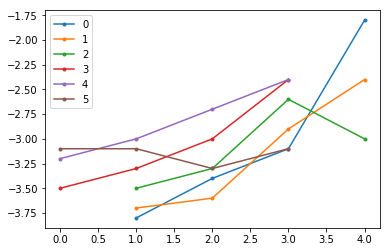

In [822]:
for i in range(6):
    plt.plot(paramtabler0n[i], marker='.', label=paramtablezz[i])
plt.legend()
# for i in range(5):
#     plt.plot(paramtabler0n.T[i], marker='.', label=paramtablem0[i])
# plt.legend()

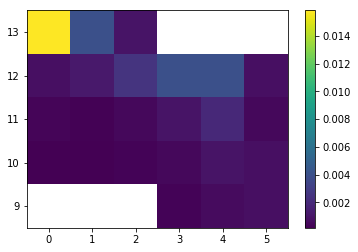

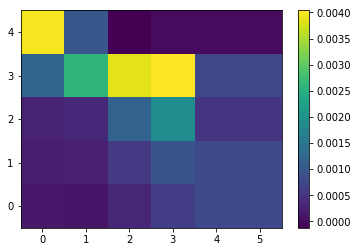

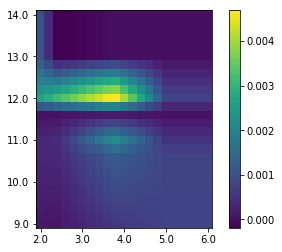

In [823]:
plt.imshow(10**paramtabler0n.T, origin='lower')
plt.xticks(ticks=np.arange(6), labels=paramtablezz)
plt.yticks(ticks=np.arange(5), labels=paramtablem0)
plt.colorbar()
plt.show()

plt.imshow(ir0nfw(np.arange(1, 7, 1), np.arange(9, 14, 1)), origin='lower',)
# plt.imshow(ir0(coordinates[:, 0][~mask], coordinates[:, 1][~mask]), origin='lower')
# plt.xticks(ticks = np.arange(5), labels=paramtablezz)
plt.colorbar()
plt.show()

xx = np.arange(2, 6.1, 0.2)
yy = np.arange(9, 14.1, 0.2)
plt.imshow(ir0nfw(xx, yy), origin='lower')
plt.xticks(ticks = np.arange(xx.size)[::5], labels=['%0.1f'%i for i in xx[::5]])
plt.yticks(ticks = np.arange(yy.size)[::5], labels=['%0.1f'%i for i in yy[::5]])
plt.colorbar()
plt.show()

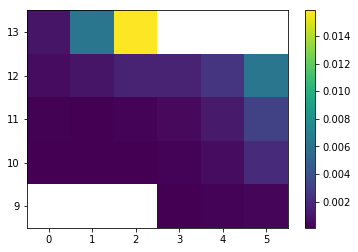

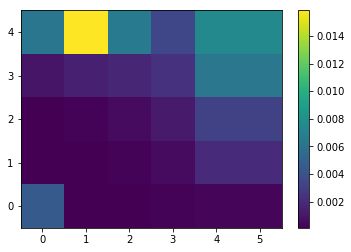

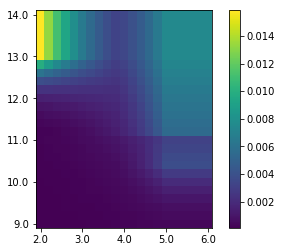

In [796]:
plt.imshow(10**paramtablers.T, origin='lower')
plt.xticks(ticks=np.arange(6), labels=paramtablezz)
plt.yticks(ticks=np.arange(5), labels=paramtablem0)
plt.colorbar()
plt.show()

plt.imshow(10**irsnfw(np.arange(1, 7, 1), np.arange(9, 14, 1)), origin='lower')
# plt.imshow(ir0(coordinates[:, 0][~mask], coordinates[:, 1][~mask]), origin='lower')
# plt.xticks(ticks = np.arange(5), labels=paramtablezz)
plt.colorbar()
plt.show()

xx = np.arange(2, 6.1, 0.2)
yy = np.arange(9, 14.1, 0.2)
plt.imshow(10**irsnfw(xx, yy), origin='lower')
plt.xticks(ticks = np.arange(xx.size)[::5], labels=['%0.1f'%i for i in xx[::5]])
plt.yticks(ticks = np.arange(yy.size)[::5], labels=['%0.1f'%i for i in yy[::5]])
plt.colorbar()
plt.show()

## Velocity dispersion

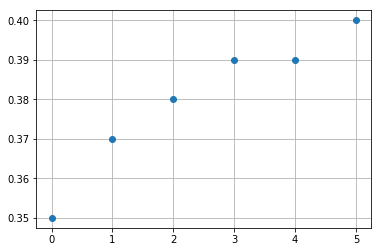

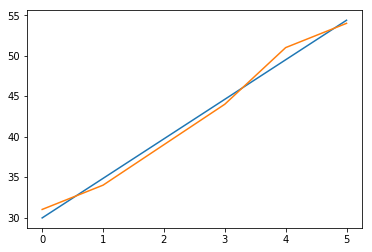

In [135]:
vdisp = np.array([31, 34, 39, 44, 51, 54])
vdispal = np.array([0.35, 0.37, 0.38, 0.39, 0.39, 0.40])
vdispz = np.arange(0, 6)
# plt.plot(vdispz, vdisp, 'o')
plt.plot(vdispz, vdispal, 'o')
plt.grid()
plt.show()

slope, intercept = np.polyfit(vdispz, vdisp, 1)
plt.plot(vdispz, slope*vdispz + intercept)
plt.plot(vdispz, vdisp)
plt.show()

Text(0, 0.5, 'Velocity dispersion')

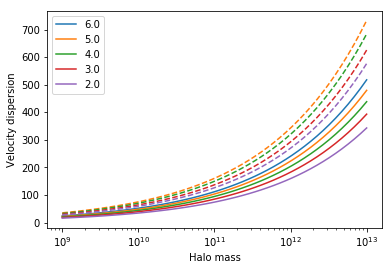

In [408]:
for iz, zz in enumerate(zzfiles[::2]):
    plt.plot(mh, 1100*(cosmo.efunc(zz)*mh/1e15)**0.333, 'C%d'%iz, label=zz)

paconorm = {2.0:59, 3.0:64, 4.0:70, 5.0:75}
for iz, zz in enumerate(zzfiles[::2]):
    try: plt.plot(mh, paconorm[zz]*(mh/1e10)**0.33, 'C%d--'%iz)
    except:pass

plt.legend()
plt.xscale('log')
plt.xlabel('Halo mass')
plt.ylabel('Velocity dispersion')
# plt.plot(mh, 1000*(0.70*mh/1e15)**0.33/(50*(mh/1e10)**0.33))
# plt.xscale('log')

#  Moster 

[]

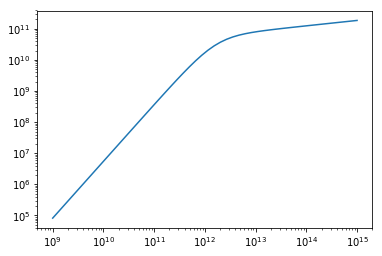

In [361]:
def moster(Mhalo,z,h=0.6776, scatter=None):
    """                                                                                                                                                                                                                                                                                   
    moster(Minf,z):                                                                                                                                                                                                                                                                       
    Returns the stellar mass (M*/h) given Minf and z from Table 1 and                                                                                                                                                                                                                       
    Eq. (2,11-14) of Moster++13 [1205.5807].                                                                                                                                                                                                                                              
    This version now works in terms of Msun/h units,
    convert to Msun units in the function
    To get "true" stellar mass, add 0.15 dex of lognormal scatter.                                                                                                                                                                                                                        
    To get "observed" stellar mass, add between 0.1-0.45 dex extra scatter.                                                                                                                                                                                                               
    """
    Minf = Mhalo/h
    zzp1  = z/(1+z)
    M1    = 10.0**(11.590+1.195*zzp1)
    mM    = 0.0351 - 0.0247*zzp1
    beta  = 1.376  - 0.826*zzp1
    gamma = 0.608  + 0.329*zzp1
    Mstar = 2*mM/( (Minf/M1)**(-beta) + (Minf/M1)**gamma )
    Mstar*= Minf
    if scatter is not None: 
        Mstar = 10**(np.log10(Mstar) + np.random.normal(0, scatter, Mstar.size))
    return Mstar*h
    #                                                                                                                                                                                                                                                                                     

    
plt.plot(mh, moster(mh, 2))
plt.loglog()

In [467]:
moster(1e9, 6)/1e8

0.0013915589933268743

In [ ]:
np.polyfit([], [], 1)


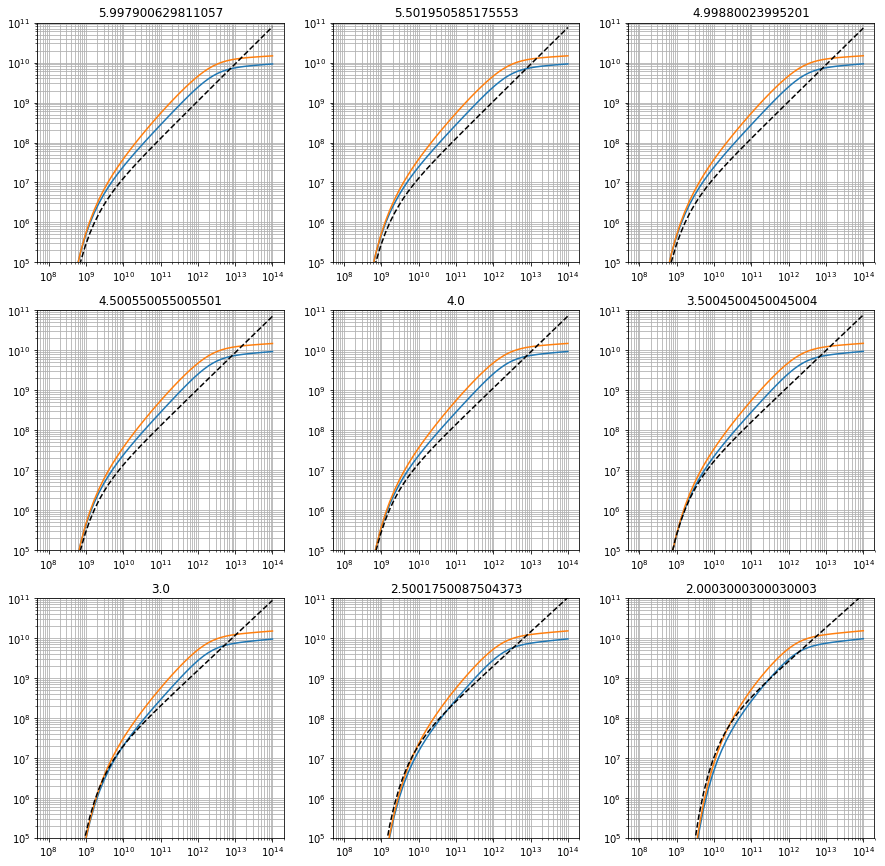

In [454]:

def dave(mhalo, zz, h=0.6776, scatter=None):
    mcut = mcutf(zz)
    mstar = moster(mhalo, zz, h=h, scatter=scatter)/h
    m, c = np.polyfit([8.1, 11], [0.2, -1.], deg=1)
    xx = np.log10(mstar)
    yy = m* xx + c
    mh1 = mstar * 10**yy
    return mh1*h * np.exp(-mcut/mhalo)


def dave2(mhalo, zz, m1 = 10**10, a1 = 0.3, a2= 0.6, h=0.6776, scatter=None):
# def dave2(mhalo, zz, m1 = 1e10, a1 = 0.5, a2= 0.2, h=0.6776, scatter=None):
    mcut = mcutf(zz)
    mstar = moster(mhalo, zz, h=h, scatter=scatter)/h
    mh1 = mstar*((mstar/m1)**a1 + (mstar/m1)**a2)**-1
    return mh1*h * np.exp(-mcut/mhalo)

# def dave3(mhalo, zz, m1 =1e8, a1 = 0.5, a2= -0.1, h=0.6776, scatter=None):
#     mcut = mcutf(zz)
#     mstar = moster(mhalo, zz, h=h, scatter=scatter)/h
#     mh1 = mstar*((mstar/m1)**a1 + (mstar/m1)**a2)**-1
#     return mh1*h * np.exp(-mcut/mhalo)


def HIm(mhalo, mcut, beta, A, mcutp=1.0):
    """Returns the 21cm "mass" for a box of halo masses."""
    xx  = mhalo/mcut+1e-10
    mHI = xx**beta * np.exp(-1/xx**mcutp)
    mHI*= A
    return(mHI)



h = 0.6776

mh  = np.logspace(8, 14)
betaf = lambda zz: (1+2*zz)/(2+2*zz)
mcutf = lambda zz : 1e9*( 1.8 + 15*(3/(zz+1))**8 )
normf = lambda zz : 3e5*(1+(3.5/zz)**6) * 10
normf2 = lambda zz : normf(zz)*(1.75 + 0.25*zz)

plt.figure(figsize = (15, 15))
for i in range(0, 9, 1):
    aa = aafiles[i]
    zz = 1/aa-1
    mcut = mcutf(zz)
    beta = betaf(zz)
    norm = normf(zz) 

    ax = plt.subplot(3, 3, i+1)
    plt.plot(mh, dave(mh, zz))
    plt.plot(mh, dave2(mh, zz))
#     plt.plot(mh, dave3(mh, zz))
    plt.plot(mh, HIm(mh, mcut, beta, norm), 'k--')
    plt.loglog()
    plt.ylim(1e5, 1e11)
    plt.title(zz)
    plt.grid(which='both')
plt.show()



In [462]:
np.vstack(([1, 2], [4, 5], [[1, 2, 4], [2, 3, 6]])).T

ValueError: all the input array dimensions except for the concatenation axis must match exactly

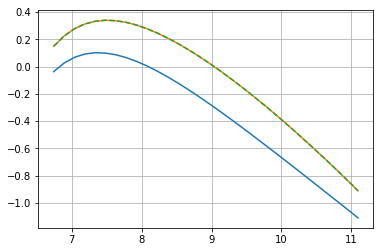

In [451]:
zz = 2

def dave3(mhalo, zz, m1 = 10**10, a1 = 0.3, a2= 0.6, h=0.6776, scatter=None):
    mcut = mcutf(zz)
    mstar = moster(mhalo, zz, h=h, scatter=scatter)/h
    mh1 = mstar*((mstar/m1)**a1 + (mstar/m1)**a2)**-1
    return mh1*h * np.exp(-mcut/mhalo)

mh  = np.logspace(10, 14)

plt.plot(np.log10(moster(mh, zz)), np.log10(dave(mh, zz)/moster(mh, zz)))
plt.plot(np.log10(moster(mh, zz)), np.log10(dave2(mh, zz)/moster(mh, zz)), '-')
plt.plot(np.log10(moster(mh, zz)), np.log10(dave3(mh, zz)/moster(mh, zz)), '--')
plt.grid()

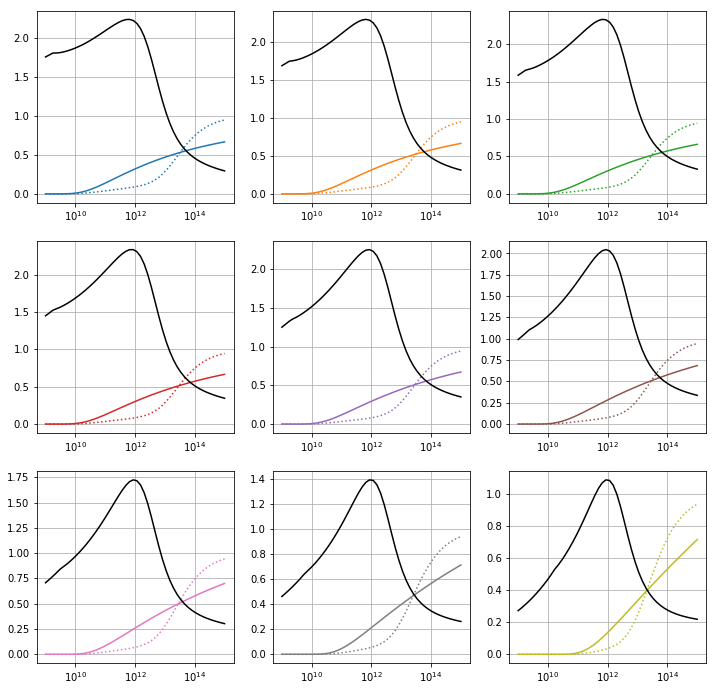

In [452]:
f = 0.03
alpha = -0.8
numf = lambda m, mh : hodanals.nmsat(m, mh, f, alpha)
mh = np.logspace(9, 15)


plt.figure(figsize = (12, 12))
for iz, zz in enumerate(zzfiles):

    mcut = mcutf(zz)
    norm = normf(zz)
    normsat = normf2(zz)
    beta = betaf(zz)

    mmin = mcut/10.
    massf = lambda m : m
    mtotsat = massweightedsum(mh, mmin, numf, massf)
    cmass = mh - mtotsat
    

    ax = plt.subplot(3, 3, iz+1)

    massfA = lambda m :  HIm(m, mcut, beta, norm)
    mhaloh1A = massfA(mh)

    massfBcen = lambda m :  dave(m, zz)
    mcenh1B = massfBcen(cmass)
    massfBsat = lambda m :  dave(m, zz)
    mtotsath1B = massweightedsum(mh, mmin, numf, massfBsat)
    plt.plot(mh, mtotsath1B/(mcenh1B + mtotsath1B), 'C%d:'%iz)
#     plt.plot(mh, massf(cmass)/massf(mh), 'C%d:'%iz)

    massfAsat = lambda m :  HIm(m, mcut, beta, normsat)
    mtotsath1A = massweightedsum(mh, mmin, numf, massfAsat)
    mcenh1A = mhaloh1A - mtotsath1A
    plt.plot(mh, mtotsath1A/mhaloh1A, 'C%d-'%iz)

    plt.plot(mh, (mtotsath1B + mcenh1B)/mhaloh1A, 'k-')
    plt.xscale('log')
    plt.grid()
#     plt.ylim(0, 1.1)

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:40: RuntimeWarning: divide by zero encountered in log10
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in power
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in multiply
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in true_divide


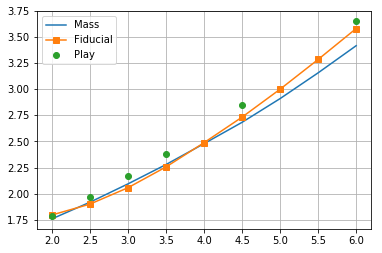

In [453]:
# Get bias


bias_table = []
n = 6

for iz, zz in enumerate(zzfiles):
    aa = aafiles[iz]
    bias_table.append(np.loadtxt(dpath + sim + '/fastpm_%0.4f/halobias_bins.txt'%aa).T)
    
btable = np.array(bias_table)



bmass = [((btable[i, 5]*btable[i, 1]*btable[i, 2]).sum()/(btable[i, 1]*btable[i, 2]).sum()) for i in range(9)]

bmh1f, bmh1 = [], []
for iz, zz in enumerate(zzfiles[:]):

    beta = betaf(zz)
    mcut= mcutf(zz)
    norm= normf(zz)
    num = (btable[iz, 5]*HIm(btable[iz, 1],  mcut=mcut, beta=beta, A=norm)*btable[iz, 2]).sum()
    den = (HIm(btable[iz, 1],  mcut=mcut, beta=beta, A=norm)*btable[iz, 2]).sum()
    bmh1f.append(num/den)

    def mh1tmp(mh):
        mtotsat = massweightedsum(mh, mmin, numf, lambda m: m)
        cmass = mh - mtotsat
        massfBcen = lambda m :  dave(m, zz)
        mcenh1B = massfBcen(cmass)
        massfBsat = lambda m :  dave(m, zz)
        mtotsath1B = massweightedsum(mh, mmin, numf, massfBsat)
        return mcenh1B + mtotsath1B
    
    num = (btable[iz, 5]*mh1tmp(btable[iz, 1])*btable[iz, 2]).sum()
    den = (mh1tmp(btable[iz, 1])*btable[iz, 2]).sum()
    bmh1.append(num/den)
    
plt.plot(zzfiles, bmass, label='Mass')
plt.plot(zzfiles, bmh1f, marker='s', label='Fiducial')
plt.plot(zzfiles, bmh1, 'o', label='Play')
plt.grid()
plt.legend()

In [445]:
btable[:, 2].shape

(9, 99)

# Cleaning


In [15]:
dpath = '/project/projectdirs/m3127/H1mass/'
# dpath = '../data/'

bs, nc = 256, 256
# sim = '/lowres/%d-9100-fixed'%256
sim = '/highres/%d-9100-fixed'%2560
aafiles = [0.1429, 0.1538, 0.1667, 0.1818, 0.2000, 0.2222, 0.2500, 0.2857, 0.3333]
zzfiles = [round(tools.atoz(aa), 2) for aa in aafiles]

aa = 0.3333
halos = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/halocat/'%aa)
cen = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/cencat/'%aa)
sat = BigFileCatalog(dpath + sim+ '/fastpm_%0.4f/satcat-m1_5p0min-alpha_0p9/'%aa)
hmass, h1mass = halos["Mass"].compute(), halos['H1mass'].compute()
cmass, ch1mass = cen["Mass"].compute(), cen['H1mass'].compute()
smass, sh1mass = sat["Mass"].compute(), sat['H1mass'].compute()
hpos, cpos, spos = halos['Position'].compute(), cen['Position'].compute(), sat['Position'].compute()
chid, shid = cen['HaloID'].compute(), sat['HaloID'].compute()



In [16]:
zzfiles

[6.0, 5.5, 5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0]

In [17]:
bs = 256
nc = 256
pm = ParticleMesh(BoxSize=bs, Nmesh = [nc, nc, nc])

In [38]:
dm = BigFileMesh('/global/project/projectdirs/m3127/H1mass/highres/2560-9100-fixed/fastpm_0.1429/dmesh_N0256', '1').paint()
meshpos = pm.paint(hpos)
mesh = pm.paint(hpos, mass=hmass)
meshposnn = pm.paint(hpos, resampler='nearest')
meshnn = pm.paint(hpos, mass=hmass, resampler='nearest')


In [42]:
cmesh = meshnn.r2c()
mask = [np.ones_like(ki) for ki in cmesh.x]
mask[2] *= abs(cmesh.x[2]) > 0.1
mask = prod(mask)
cmesh *= mask
mesh2 = cmesh.c2r()
mesh3 = cmesh.apply(lambda k, v: v*np.exp(-sum(ki**2 for ki in k)*1**2)).c2r()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


In [20]:
from matplotlib.colors import LogNorm, SymLogNorm

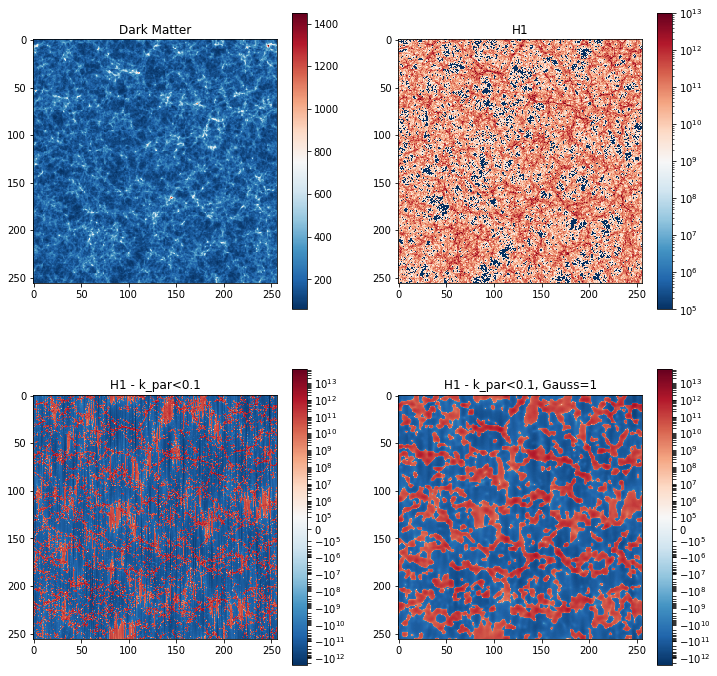

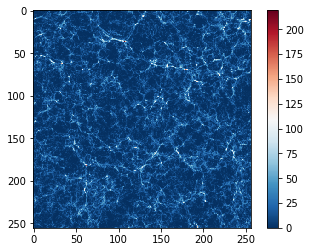

In [43]:
norm = LogNorm(1e5, 1e13)
# norm = None
x1, x2 = 5, 10
cmap = 'RdBu_r'

fig, ax = plt.subplots(2, 2, figsize = (12, 12))
im = ax[0, 0].imshow(dm[...][x1:x2, :, :].sum(axis=0).T, cmap=cmap)
plt.colorbar(im, ax=ax[0, 0])
ax[0, 0].set_title('Dark Matter')
im = ax[0, 1].imshow(1+meshnn[...][x1:x2, :, :].sum(axis=0).T, norm=norm, cmap=cmap)
plt.colorbar(im, ax=ax[0, 1])
norm = SymLogNorm(1e5)
ax[0, 1].set_title('H1')
im = ax[1, 0].imshow(1+mesh2[...][x1:x2, :, :].sum(axis=0).T, norm=norm, cmap=cmap)
plt.colorbar(im, ax=ax[1, 0])
ax[1, 0].set_title('H1 - k_par<0.1')
im = ax[1, 1].imshow(1+mesh3[...][x1:x2, :, :].sum(axis=0).T, norm=norm, cmap=cmap)
plt.colorbar(im, ax=ax[1, 1])
ax[1, 1].set_title('H1 - k_par<0.1, Gauss=1')
plt.show()
im = plt.imshow(meshposnn[...][x1:x2, :, :].sum(axis=0).T, cmap=cmap)
plt.colorbar(im)

In [24]:
%timeit sum([1, 2, 3])

9.17 µs ± 321 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [25]:
%timeit np.array([1, 2, 3]).sum()

5.39 µs ± 98.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [44]:
hpos[0]/bs*nc

array([23.932821, 62.835903, 25.79345 ], dtype=float32)

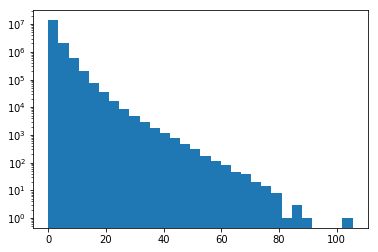

In [45]:
plt.hist(meshpos[...].flatten(), bins=30, log=True)
plt.show()

In [46]:
p1 = FFTPower(mesh/mesh.cmean(), mode='1d').power
p2 = FFTPower(mesh2/mesh.cmean(), mode='1d').power
p3 = FFTPower(mesh3/mesh.cmean(), mode='1d').power
p13 = FFTPower(mesh/mesh.cmean(), second=mesh3/mesh.cmean(), mode='1d').power

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(1, 100000.0)

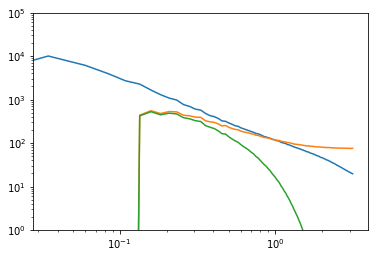

In [47]:
plt.loglog(p1['k'], p1['power'])
plt.loglog(p1['k'], p2['power'])
plt.loglog(p1['k'], p3['power'])
plt.ylim(1, 1e5)

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


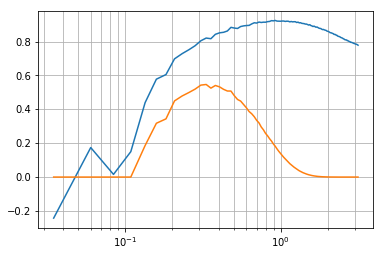

In [48]:
plt.semilogx(p1['k'], p13['power']*(p3['power']*p1['power'])**-0.5)
plt.semilogx(p1['k'], (p3['power']/p1['power'])**1)
plt.grid(which='both')
plt.show()

In [49]:
xx = np.log10(1+mesh[...].flatten())
yy = np.log10(1+mesh3[...].flatten())
yy2 = np.log10((1-mesh3[...]).flatten())

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


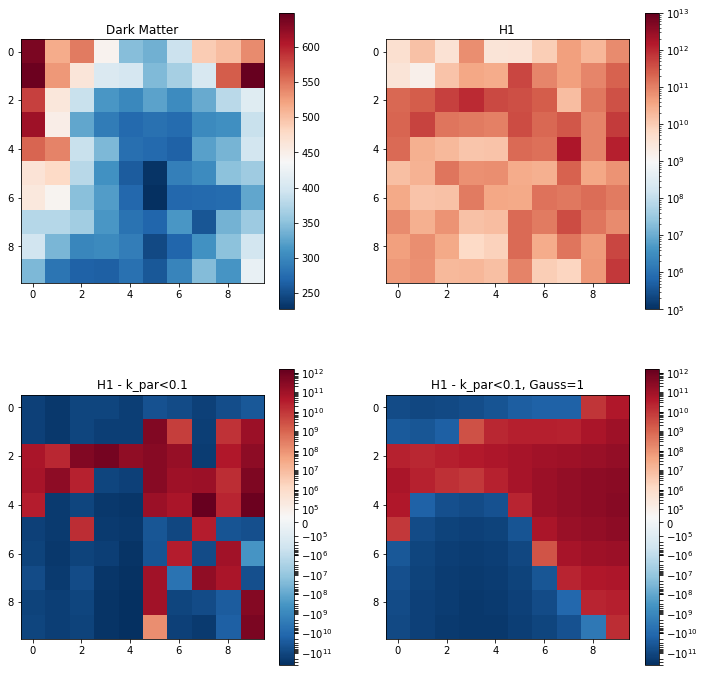

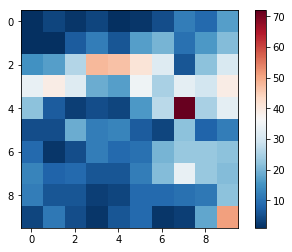

In [50]:
norm = LogNorm(1e5, 1e13)
# norm = None
x1, x2 = 5, 15
y1, y2 = 5, 15
z1, z2 = 5, 15
cmap = 'RdBu_r'

fig, ax = plt.subplots(2, 2, figsize = (12, 12))
im = ax[0, 0].imshow(dm[...][x1:x2, y1:y2, z1:z2].sum(axis=0).T, cmap=cmap)
plt.colorbar(im, ax=ax[0, 0])
ax[0, 0].set_title('Dark Matter')
im = ax[0, 1].imshow(1+meshnn[...][x1:x2, y1:y2, z1:z2].sum(axis=0).T, norm=norm, cmap=cmap)
plt.colorbar(im, ax=ax[0, 1])
norm = SymLogNorm(1e5)
ax[0, 1].set_title('H1')
im = ax[1, 0].imshow(1+mesh2[...][x1:x2, y1:y2, z1:z2].sum(axis=0).T, norm=norm, cmap=cmap)
plt.colorbar(im, ax=ax[1, 0])
ax[1, 0].set_title('H1 - k_par<0.1')
im = ax[1, 1].imshow(1+mesh3[...][x1:x2, y1:y2, z1:z2].sum(axis=0).T, norm=norm, cmap=cmap)
plt.colorbar(im, ax=ax[1, 1])
ax[1, 1].set_title('H1 - k_par<0.1, Gauss=1')
plt.show()
im = plt.imshow(meshposnn[...][x1:x2, y1:y2, z1:z2].sum(axis=0).T, cmap=cmap)
plt.colorbar(im)

In [41]:
(meshposnn[...][x1:x2, y1:y2, z1:z2] == 0).sum()

550

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


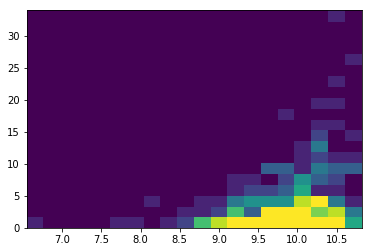

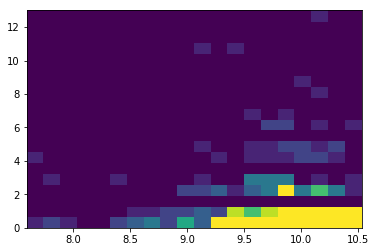

In [65]:
xx = np.log10(mesh3[...][x1:x2, y1:y2, z1:z2].flatten())
xxm = np.log10(-mesh3[...][x1:x2, y1:y2, z1:z2].flatten())
yy= meshposnn[...][x1:x2, y1:y2, z1:z2].flatten()
# plt.scatter(xx, yy)
mask = ~np.isnan(xx)
plt.hist2d(xx[mask], yy[mask], vmin=0, vmax=10, bins=20)
plt.show()
mask = np.isnan(xx)
im = plt.hist2d(xxm[mask], yy[mask], vmin=0, vmax=10, bins=20)
plt.show()

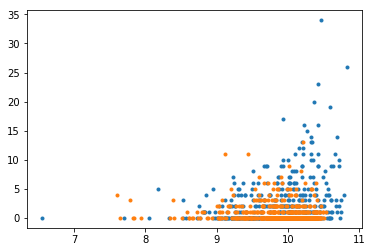

In [69]:
plt.plot(xx, yy, '.')
plt.plot(xxm, yy, '.')


In [175]:
# tab0 = np.loadtxt('/global/u1/c/chmodi/Programs/Py_codes/Ipython/PertTheory/CLEFT_GSM/ps_python3/ema_ps/pk_Planck2018BAO_matterpower_z000_cleftqfunc_z150.dat').T
# tab1 = np.loadtxt('/global/u1/c/chmodi/Programs/Py_codes/Ipython/PertTheory/CLEFT_GSM/ps_python3/RunPB/pklin_RunPB_cleftqfunc_z150.txt').T

tab0 = np.loadtxt('/global/u1/c/chmodi/Programs/Py_codes/Ipython/PertTheory/CLEFT_GSM/ps_python3/ema_ps/pk_Planck2018BAO_matterpower_z000_cleftpk_z150.dat').T
tab1 = np.loadtxt('/global/u1/c/chmodi/Programs/Py_codes/Ipython/PertTheory/CLEFT_GSM/ps_python3/RunPB/pklin_RunPB_cleftpk_z150.txt').T

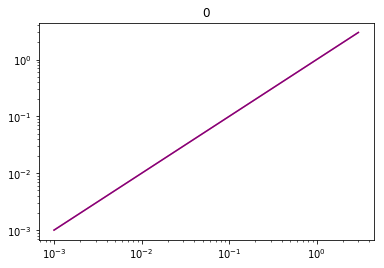

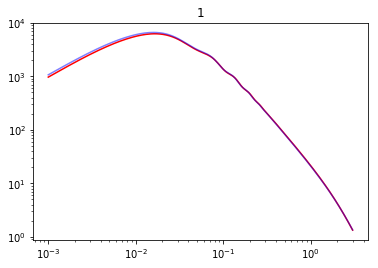

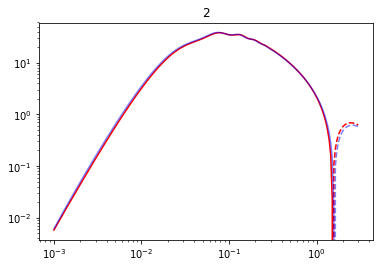

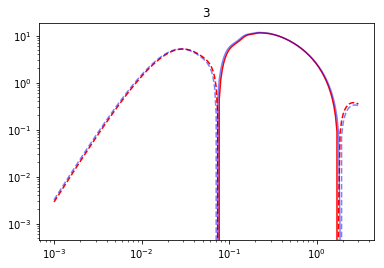

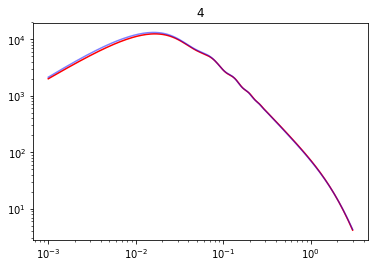

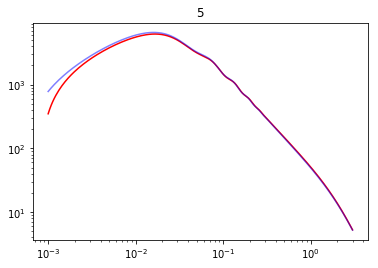

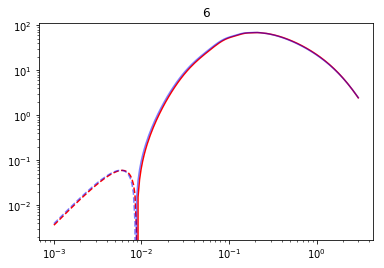

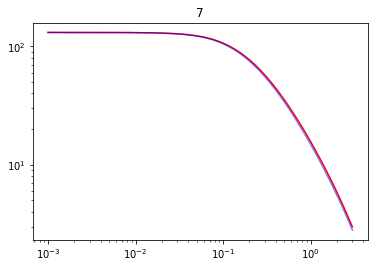

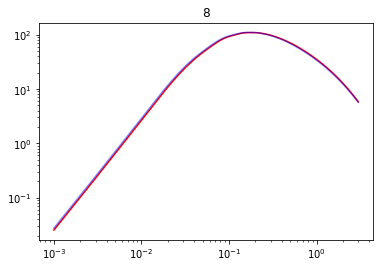

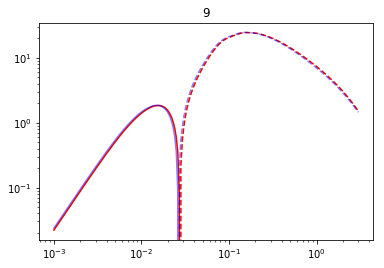

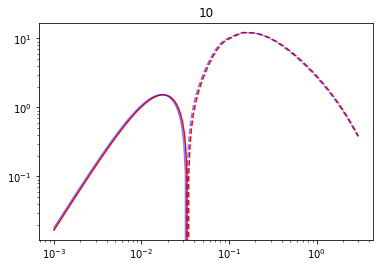

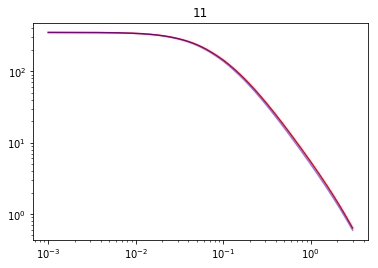

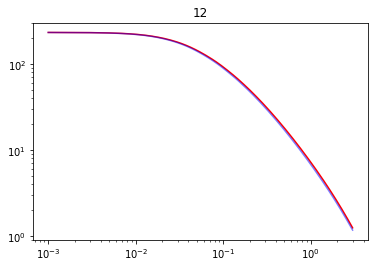

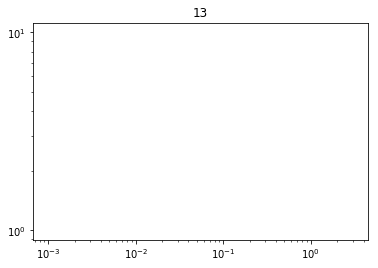

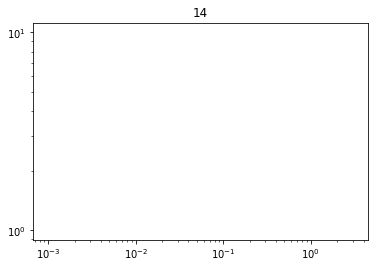

In [176]:

for ii in range(tab0.shape[0]):
    plt.plot(tab0[0], tab0[ii], 'r')
    plt.plot(tab0[0], -tab0[ii], 'r--')
    plt.plot(tab1[0], tab1[ii], 'b', alpha=0.5)
    plt.plot(tab1[0], -tab1[ii], 'b--', alpha=0.5)
    plt.loglog()
    plt.title(ii)
    plt.show()